# CNN


In [1]:
from keras.preprocessing.image import ImageDataGenerator
def create_generators(img_size = 128, datasetpath = 'dataset', batch_size = 32):
        datagen = ImageDataGenerator(
                             rescale = 1./255,
                             rotation_range=30,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True)

        train_generator = datagen.flow_from_directory(
                                           datasetpath + '/' + 'training',
                                           target_size = (img_size, img_size),
                                           class_mode = 'categorical', 
                                           batch_size = batch_size
                                           )
        
        datagen = ImageDataGenerator(rescale = 1./255)

        validation_generator = datagen.flow_from_directory(
                                            datasetpath + '/' + 'validation',
                                            target_size = (img_size, img_size),
                                            class_mode = 'categorical',
                                            batch_size = batch_size
                                            )
        
        test_generator = datagen.flow_from_directory(
                                            datasetpath + '/' + 'testing',
                                            target_size = (img_size, img_size),
                                            class_mode = 'categorical',
                                            batch_size = batch_size,
                                            shuffle = False
                                            )
        
        return train_generator, validation_generator , test_generator


Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
def create_model (nb_filters = 32, nb_layers = 3, img_size = 128):
    
    model = Sequential()
    
    model.add(Convolution2D(nb_filters, (3, 3), input_shape=(img_size, img_size, 3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    k = 1
    
    for i in range (2, (nb_layers + 1)):    
        model.add(Convolution2D(nb_filters * k, (3, 3),activation = 'relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        k = k * 2

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4,activation = 'softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [3]:
import matplotlib.pyplot as plt
def draw_graph(History, arg): #arg = acc|loss
    plt.tight_layout()
    plt.plot(History.history[arg])
    val_arg = 'val_' + arg
    plt.plot(History.history[val_arg])
    plt.title('Model '+ arg)
    plt.ylabel(arg)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    plt.show()

In [4]:
def save_model(model):
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    model.save_weights("model.h5")

In [5]:
def find_label(prediction_array):
        prediction = prediction_array.argmax()
        for x in train_generator.class_indices:
            if train_generator.class_indices[x] == prediction:
                return x

In [6]:
# taken from https://scikit-learn.org/stable/auto_examples
#/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


D:\Programs\Anaconda\envs\env\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
D:\Programs\Anaconda\envs\env\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=138, validation_data=<keras_pre..., validation_steps=39, callbacks=[<keras.ca..., epochs=50)`


Epoch 1/50
138/138 [==============================] - 18s 132ms/step - loss: 1.3778 - acc: 0.4234 - val_loss: 1.0142 - val_acc: 0.5686
Epoch 2/50
138/138 [==============================] - 18s 130ms/step - loss: 1.0527 - acc: 0.5428 - val_loss: 0.9315 - val_acc: 0.5686
Epoch 3/50
138/138 [==============================] - 18s 129ms/step - loss: 0.9854 - acc: 0.5778 - val_loss: 0.8427 - val_acc: 0.6618
Epoch 4/50
138/138 [==============================] - 18s 128ms/step - loss: 0.9257 - acc: 0.6184 - val_loss: 0.7902 - val_acc: 0.6781
Epoch 5/50
138/138 [==============================] - 18s 129ms/step - loss: 0.8846 - acc: 0.6370 - val_loss: 0.8815 - val_acc: 0.6275
Epoch 6/50
138/138 [==============================] - 18s 129ms/step - loss: 0.8599 - acc: 0.6675 - val_loss: 0.7117 - val_acc: 0.7320
Epoch 7/50
138/138 [==============================] - 18s 129ms/step - loss: 0.8467 - acc: 0.6606 - val_loss: 0.7953 - val_acc: 0.6520
Epoch 8/50
138/138 [==============================] - 1

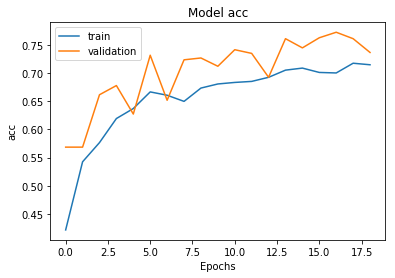

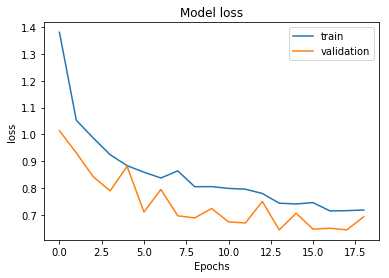

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


D:\Programs\Anaconda\envs\env\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=69, validation_data=<keras_pre..., validation_steps=20, callbacks=[<keras.ca..., epochs=50)`


Epoch 1/50
69/69 [==============================] - 16s 228ms/step - loss: 1.4263 - acc: 0.3400 - val_loss: 1.1746 - val_acc: 0.5637
Epoch 2/50
69/69 [==============================] - 15s 211ms/step - loss: 1.1806 - acc: 0.4618 - val_loss: 1.0239 - val_acc: 0.5719
Epoch 3/50
69/69 [==============================] - 15s 213ms/step - loss: 1.0805 - acc: 0.5330 - val_loss: 0.9492 - val_acc: 0.5964
Epoch 4/50
69/69 [==============================] - 15s 219ms/step - loss: 1.0388 - acc: 0.5493 - val_loss: 0.8744 - val_acc: 0.6667
Epoch 5/50
69/69 [==============================] - 15s 210ms/step - loss: 0.9842 - acc: 0.5796 - val_loss: 0.8253 - val_acc: 0.6618
Epoch 6/50
69/69 [==============================] - 15s 213ms/step - loss: 0.9315 - acc: 0.6125 - val_loss: 0.8194 - val_acc: 0.6699
Epoch 7/50
69/69 [==============================] - 15s 219ms/step - loss: 0.9048 - acc: 0.6322 - val_loss: 0.7923 - val_acc: 0.6634
Epoch 8/50
69/69 [==============================] - 15s 213ms/step - 

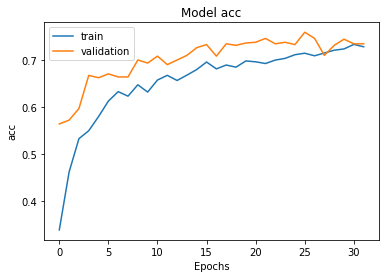

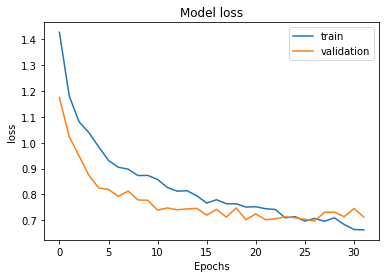

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


D:\Programs\Anaconda\envs\env\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=35, validation_data=<keras_pre..., validation_steps=10, callbacks=[<keras.ca..., epochs=50)`


Epoch 1/50
35/35 [==============================] - 14s 393ms/step - loss: 1.6727 - acc: 0.3242 - val_loss: 1.2636 - val_acc: 0.4297
Epoch 2/50
35/35 [==============================] - 13s 381ms/step - loss: 1.2544 - acc: 0.3979 - val_loss: 1.1684 - val_acc: 0.5131
Epoch 3/50
35/35 [==============================] - 13s 385ms/step - loss: 1.1709 - acc: 0.4739 - val_loss: 1.0507 - val_acc: 0.5539
Epoch 4/50
35/35 [==============================] - 13s 383ms/step - loss: 1.1359 - acc: 0.4846 - val_loss: 0.9867 - val_acc: 0.6095
Epoch 5/50
35/35 [==============================] - 13s 384ms/step - loss: 1.1111 - acc: 0.4828 - val_loss: 1.0883 - val_acc: 0.4918
Epoch 6/50
35/35 [==============================] - 13s 382ms/step - loss: 1.1148 - acc: 0.4966 - val_loss: 0.9614 - val_acc: 0.6242
Epoch 7/50
35/35 [==============================] - 13s 375ms/step - loss: 1.0785 - acc: 0.5199 - val_loss: 0.9610 - val_acc: 0.6258
Epoch 8/50
35/35 [==============================] - 14s 387ms/step - 

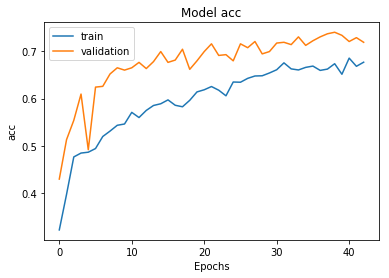

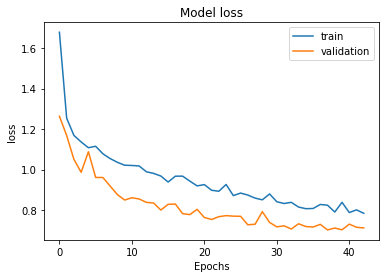

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 44s 316ms/step - loss: 3.3067 - acc: 0.4286 - val_loss: 1.0181 - val_acc: 0.5686
Epoch 2/50
138/138 [==============================] - 42s 305ms/step - loss: 1.0377 - acc: 0.5787 - val_loss: 0.8946 - val_acc: 0.6487
Epoch 3/50
138/138 [==============================] - 42s 301ms/step - loss: 0.9771 - acc: 0.6118 - val_loss: 0.8362 - val_acc: 0.6585
Epoch 4/50
138/138 [==============================] - 43s 308ms/step - loss: 0.9332 - acc: 0.6256 - val_loss: 0.8395 - val_acc: 0.6144
Epoch 5/50
138/138 [==============================] - 43s 314ms/step - loss: 0.9067 - acc: 0.6435 - val_loss: 0.7691 - val_acc: 0.6879
Epoch 6/50
138/138 [==============================] - 43s 309ms/step - loss: 0.8606 - acc: 0.6616 - val_loss: 0.7603 - val_acc: 0.7026
Epoch 7/50
138/138 [==============================] - 42s 305ms/st

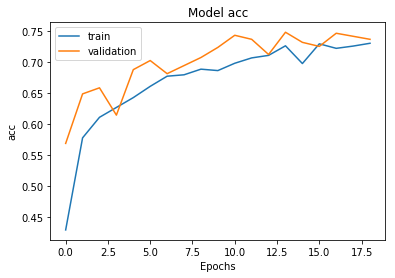

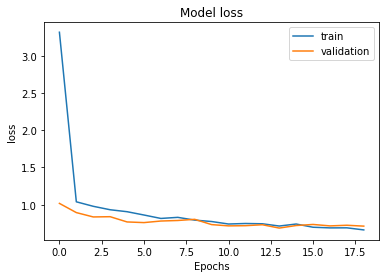

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 36s 521ms/step - loss: 4.6670 - acc: 0.3642 - val_loss: 1.2023 - val_acc: 0.4559
Epoch 2/50
69/69 [==============================] - 35s 504ms/step - loss: 1.1950 - acc: 0.4646 - val_loss: 1.0733 - val_acc: 0.5229
Epoch 3/50
69/69 [==============================] - 34s 496ms/step - loss: 1.1313 - acc: 0.5212 - val_loss: 0.9461 - val_acc: 0.6209
Epoch 4/50
69/69 [==============================] - 34s 496ms/step - loss: 1.0330 - acc: 0.5833 - val_loss: 0.8684 - val_acc: 0.6601
Epoch 5/50
69/69 [==============================] - 34s 499ms/step - loss: 1.0046 - acc: 0.5817 - val_loss: 0.8395 - val_acc: 0.6699
Epoch 6/50
69/69 [==============================] - 34s 492ms/step - loss: 0.9441 - acc: 0.6170 - val_loss: 0.8348 - val_acc: 0.6814
Epoch 7/50
69/69 [==============================] - 35s 501ms/step - loss: 0.9

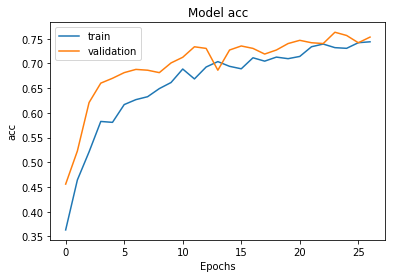

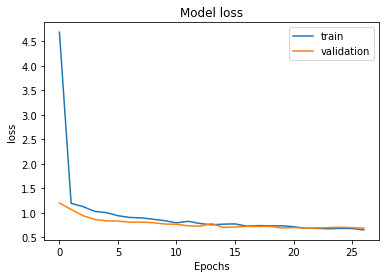

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 32s 927ms/step - loss: 3.9275 - acc: 0.2854 - val_loss: 1.2964 - val_acc: 0.3758
Epoch 2/50
35/35 [==============================] - 31s 874ms/step - loss: 1.2459 - acc: 0.3957 - val_loss: 1.0813 - val_acc: 0.5212
Epoch 3/50
35/35 [==============================] - 30s 870ms/step - loss: 1.1138 - acc: 0.4703 - val_loss: 0.9598 - val_acc: 0.5948
Epoch 4/50
35/35 [==============================] - 31s 874ms/step - loss: 1.0789 - acc: 0.5270 - val_loss: 0.8955 - val_acc: 0.6487
Epoch 5/50
35/35 [==============================] - 31s 882ms/step - loss: 1.0131 - acc: 0.5605 - val_loss: 0.9107 - val_acc: 0.6438
Epoch 6/50
35/35 [==============================] - 31s 875ms/step - loss: 1.0072 - acc: 0.5989 - val_loss: 0.8446 - val_acc: 0.6797
Epoch 7/50
35/35 [==============================] - 41s 1s/step - loss: 0.9876

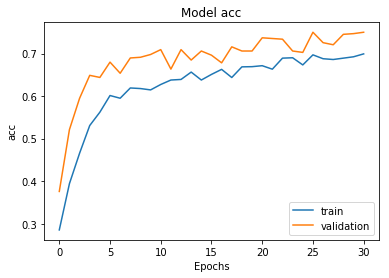

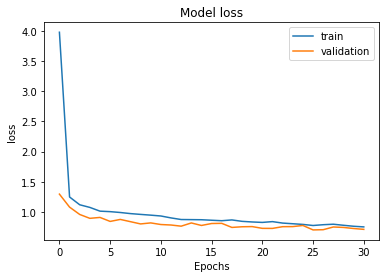

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 18s 127ms/step - loss: 1.1464 - acc: 0.4930 - val_loss: 0.9370 - val_acc: 0.6340
Epoch 2/50
138/138 [==============================] - 17s 122ms/step - loss: 0.9674 - acc: 0.6001 - val_loss: 0.8952 - val_acc: 0.6422
Epoch 3/50
138/138 [==============================] - 17s 120ms/step - loss: 0.9406 - acc: 0.6052 - val_loss: 0.8178 - val_acc: 0.6879
Epoch 4/50
138/138 [==============================] - 17s 122ms/step - loss: 0.8877 - acc: 0.6366 - val_loss: 0.8334 - val_acc: 0.6667
Epoch 5/50
138/138 [==============================] - 17s 122ms/step - loss: 0.8467 - acc: 0.6484 - val_loss: 0.8130 - val_acc: 0.6667
Epoch 6/50
138/138 [==============================] - 17s 120ms/step - loss: 0.8310 - acc: 0.6610 - val_loss: 0.7665 - val_acc: 0.7271
Epoch 7/50
138/138 [==============================] - 17s 120ms/st

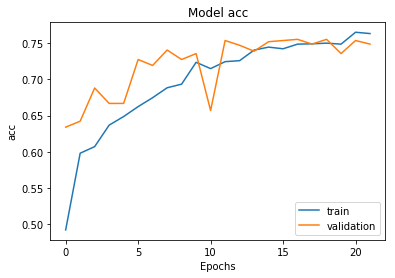

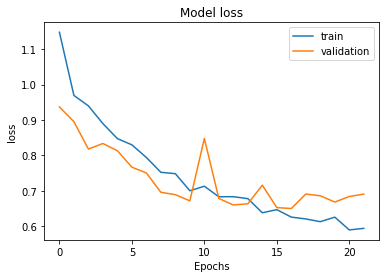

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 16s 229ms/step - loss: 1.3022 - acc: 0.3862 - val_loss: 1.1183 - val_acc: 0.4984
Epoch 2/50
69/69 [==============================] - 15s 220ms/step - loss: 1.0522 - acc: 0.5406 - val_loss: 0.9271 - val_acc: 0.6291
Epoch 3/50
69/69 [==============================] - 15s 217ms/step - loss: 0.9538 - acc: 0.5979 - val_loss: 0.8990 - val_acc: 0.6405
Epoch 4/50
69/69 [==============================] - 15s 215ms/step - loss: 0.8928 - acc: 0.6238 - val_loss: 0.8336 - val_acc: 0.6667
Epoch 5/50
69/69 [==============================] - 15s 218ms/step - loss: 0.8821 - acc: 0.6392 - val_loss: 0.8251 - val_acc: 0.6569
Epoch 6/50
69/69 [==============================] - 15s 215ms/step - loss: 0.8410 - acc: 0.6643 - val_loss: 0.7549 - val_acc: 0.6961
Epoch 7/50
69/69 [==============================] - 15s 220ms/step - loss: 0.8

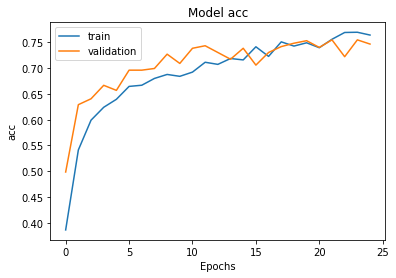

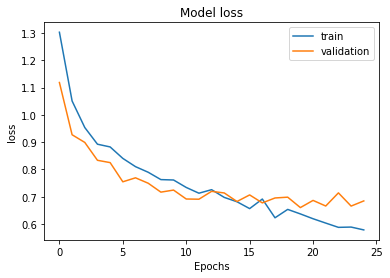

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 15s 419ms/step - loss: 1.2132 - acc: 0.4413 - val_loss: 0.9766 - val_acc: 0.6013
Epoch 2/50
35/35 [==============================] - 14s 403ms/step - loss: 1.0067 - acc: 0.5529 - val_loss: 0.9011 - val_acc: 0.6307
Epoch 3/50
35/35 [==============================] - 14s 406ms/step - loss: 0.9258 - acc: 0.6021 - val_loss: 0.8560 - val_acc: 0.6471
Epoch 4/50
35/35 [==============================] - 14s 405ms/step - loss: 0.9266 - acc: 0.6061 - val_loss: 0.8100 - val_acc: 0.6634
Epoch 5/50
35/35 [==============================] - 14s 407ms/step - loss: 0.8880 - acc: 0.6293 - val_loss: 0.7917 - val_acc: 0.6961
Epoch 6/50
35/35 [==============================] - 14s 403ms/step - loss: 0.8515 - acc: 0.6530 - val_loss: 0.8256 - val_acc: 0.6716
Epoch 7/50
35/35 [==============================] - 14s 404ms/step - loss: 0.8

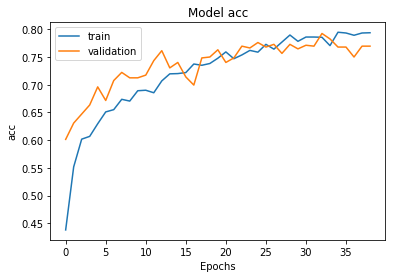

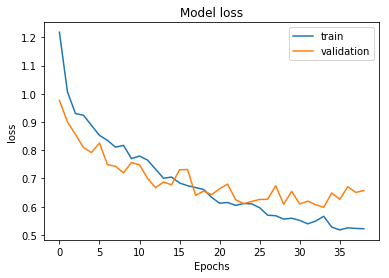

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 40s 288ms/step - loss: 1.1865 - acc: 0.4903 - val_loss: 0.9296 - val_acc: 0.6307
Epoch 2/50
138/138 [==============================] - 39s 280ms/step - loss: 0.9766 - acc: 0.5758 - val_loss: 0.8508 - val_acc: 0.6634
Epoch 3/50
138/138 [==============================] - 39s 280ms/step - loss: 0.9481 - acc: 0.6058 - val_loss: 0.8258 - val_acc: 0.6748
Epoch 4/50
138/138 [==============================] - 39s 281ms/step - loss: 0.8916 - acc: 0.6369 - val_loss: 0.8085 - val_acc: 0.6732
Epoch 5/50
138/138 [==============================] - 38s 278ms/step - loss: 0.8496 - acc: 0.6521 - val_loss: 0.7648 - val_acc: 0.6928
Epoch 6/50
138/138 [==============================] - 39s 279ms/step - loss: 0.8313 - acc: 0.6565 - val_loss: 0.7636 - val_acc: 0.6748
Epoch 7/50
138/138 [==============================] - 39s 280ms/st

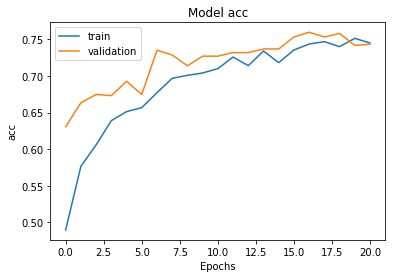

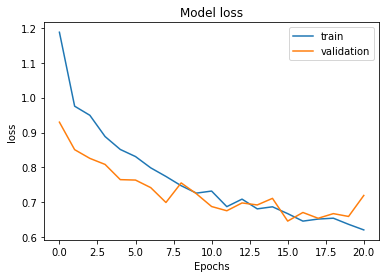

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 36s 526ms/step - loss: 1.1988 - acc: 0.4725 - val_loss: 0.8791 - val_acc: 0.6716
Epoch 2/50
69/69 [==============================] - 35s 508ms/step - loss: 0.9435 - acc: 0.6172 - val_loss: 0.8371 - val_acc: 0.6748
Epoch 3/50
69/69 [==============================] - 35s 504ms/step - loss: 0.9068 - acc: 0.6322 - val_loss: 0.7920 - val_acc: 0.7042
Epoch 4/50
69/69 [==============================] - 35s 508ms/step - loss: 0.8588 - acc: 0.6560 - val_loss: 0.7946 - val_acc: 0.6944
Epoch 5/50
69/69 [==============================] - 35s 506ms/step - loss: 0.8270 - acc: 0.6600 - val_loss: 0.7607 - val_acc: 0.7059
Epoch 6/50
69/69 [==============================] - 35s 504ms/step - loss: 0.8185 - acc: 0.6716 - val_loss: 0.7446 - val_acc: 0.7288
Epoch 7/50
69/69 [==============================] - 35s 506ms/step - loss: 0.8

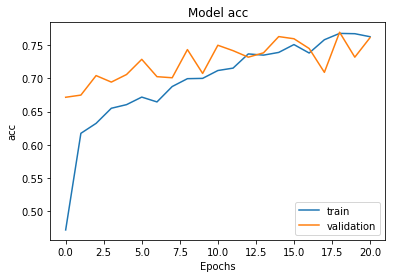

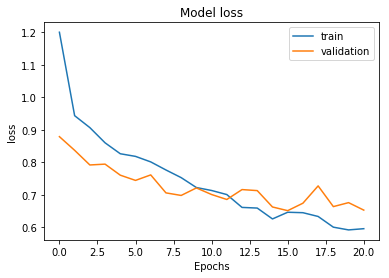

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 36s 1s/step - loss: 1.1145 - acc: 0.5015 - val_loss: 0.9504 - val_acc: 0.6242
Epoch 2/50
35/35 [==============================] - 33s 949ms/step - loss: 0.9409 - acc: 0.6092 - val_loss: 0.8854 - val_acc: 0.6797
Epoch 3/50
35/35 [==============================] - 33s 950ms/step - loss: 0.8966 - acc: 0.6396 - val_loss: 0.8195 - val_acc: 0.6683
Epoch 4/50
35/35 [==============================] - 33s 949ms/step - loss: 0.8674 - acc: 0.6516 - val_loss: 0.8441 - val_acc: 0.6716
Epoch 5/50
35/35 [==============================] - 33s 956ms/step - loss: 0.8413 - acc: 0.6606 - val_loss: 0.7874 - val_acc: 0.6797
Epoch 6/50
35/35 [==============================] - 33s 947ms/step - loss: 0.8034 - acc: 0.6753 - val_loss: 0.7757 - val_acc: 0.6618
Epoch 7/50
35/35 [==============================] - 33s 946ms/step - loss: 0.7860

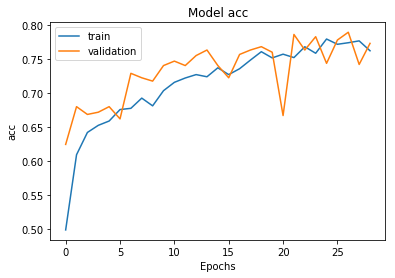

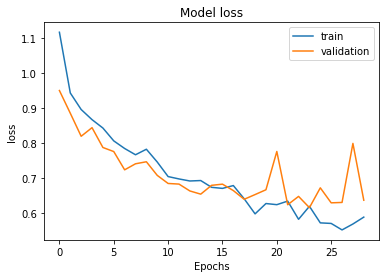

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 18s 128ms/step - loss: 1.1509 - acc: 0.4749 - val_loss: 0.9079 - val_acc: 0.6144
Epoch 2/50
138/138 [==============================] - 16s 119ms/step - loss: 0.9638 - acc: 0.5886 - val_loss: 0.8527 - val_acc: 0.6062
Epoch 3/50
138/138 [==============================] - 17s 120ms/step - loss: 0.8876 - acc: 0.6259 - val_loss: 0.8618 - val_acc: 0.6422
Epoch 4/50
138/138 [==============================] - 16s 119ms/step - loss: 0.8683 - acc: 0.6217 - val_loss: 0.7844 - val_acc: 0.6912
Epoch 5/50
138/138 [==============================] - 16s 118ms/step - loss: 0.8212 - acc: 0.6579 - val_loss: 0.7827 - val_acc: 0.6781
Epoch 6/50
138/138 [==============================] - 17s 120ms/step - loss: 0.7792 - acc: 0.6824 - val_loss: 0.7179 - val_acc: 0.7108
Epoch 7/50
138/138 [==============================] - 17s 121ms/st

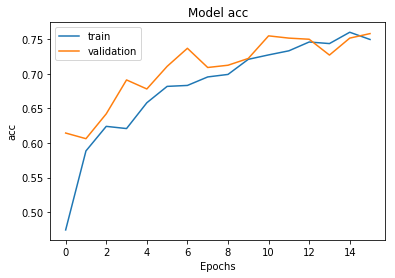

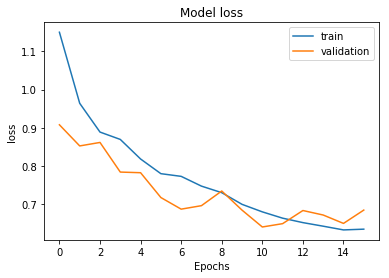

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 16s 235ms/step - loss: 1.2074 - acc: 0.4433 - val_loss: 1.0594 - val_acc: 0.5343
Epoch 2/50
69/69 [==============================] - 15s 216ms/step - loss: 1.0327 - acc: 0.5586 - val_loss: 0.9920 - val_acc: 0.5605
Epoch 3/50
69/69 [==============================] - 15s 219ms/step - loss: 0.9705 - acc: 0.5678 - val_loss: 0.9529 - val_acc: 0.5964
Epoch 4/50
69/69 [==============================] - 15s 222ms/step - loss: 0.9047 - acc: 0.6082 - val_loss: 0.8859 - val_acc: 0.6471
Epoch 5/50
69/69 [==============================] - 15s 220ms/step - loss: 0.8648 - acc: 0.6392 - val_loss: 0.8452 - val_acc: 0.6487
Epoch 6/50
69/69 [==============================] - 15s 221ms/step - loss: 0.8342 - acc: 0.6544 - val_loss: 0.8220 - val_acc: 0.6699
Epoch 7/50
69/69 [==============================] - 15s 217ms/step - loss: 0.7

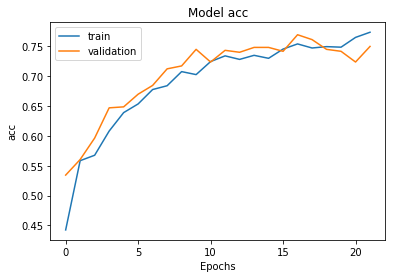

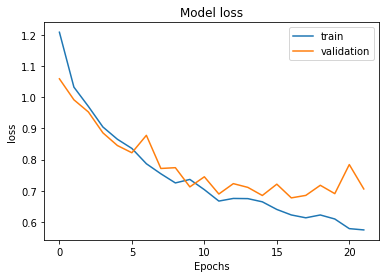

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 15s 434ms/step - loss: 1.2387 - acc: 0.4153 - val_loss: 1.0737 - val_acc: 0.5474
Epoch 2/50
35/35 [==============================] - 14s 409ms/step - loss: 1.0471 - acc: 0.5436 - val_loss: 0.9207 - val_acc: 0.6176
Epoch 3/50
35/35 [==============================] - 14s 411ms/step - loss: 0.9660 - acc: 0.5824 - val_loss: 0.9262 - val_acc: 0.5915
Epoch 4/50
35/35 [==============================] - 14s 413ms/step - loss: 0.9302 - acc: 0.6114 - val_loss: 0.9532 - val_acc: 0.6127
Epoch 5/50
35/35 [==============================] - 15s 415ms/step - loss: 0.9153 - acc: 0.6195 - val_loss: 0.8592 - val_acc: 0.6699
Epoch 6/50
35/35 [==============================] - 14s 409ms/step - loss: 0.8607 - acc: 0.6364 - val_loss: 0.8075 - val_acc: 0.6650
Epoch 7/50
35/35 [==============================] - 15s 415ms/step - loss: 0.8

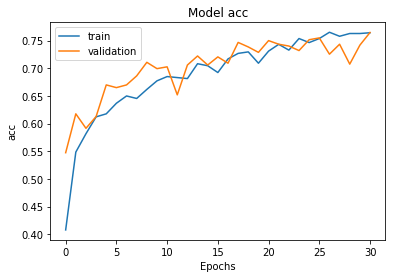

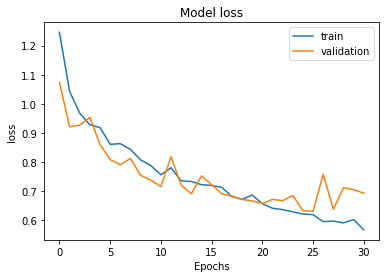

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 40s 293ms/step - loss: 1.1442 - acc: 0.4953 - val_loss: 0.9553 - val_acc: 0.5735
Epoch 2/50
138/138 [==============================] - 39s 281ms/step - loss: 0.9732 - acc: 0.5990 - val_loss: 0.9092 - val_acc: 0.6176
Epoch 3/50
138/138 [==============================] - 39s 282ms/step - loss: 0.8866 - acc: 0.6429 - val_loss: 0.8667 - val_acc: 0.6471
Epoch 4/50
138/138 [==============================] - 40s 290ms/step - loss: 0.8568 - acc: 0.6503 - val_loss: 0.7399 - val_acc: 0.7320
Epoch 5/50
138/138 [==============================] - 39s 284ms/step - loss: 0.8184 - acc: 0.6773 - val_loss: 0.7119 - val_acc: 0.7516
Epoch 6/50
138/138 [==============================] - 39s 281ms/step - loss: 0.7596 - acc: 0.6815 - val_loss: 0.6870 - val_acc: 0.7271
Epoch 7/50
138/138 [==============================] - 39s 283ms/st

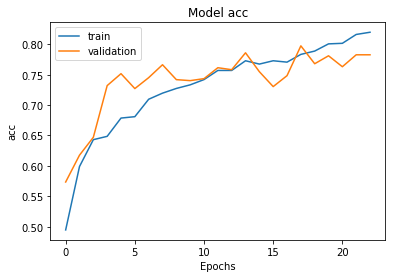

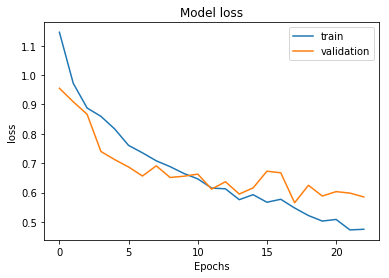

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 38s 549ms/step - loss: 1.2298 - acc: 0.4333 - val_loss: 1.0098 - val_acc: 0.5801
Epoch 2/50
69/69 [==============================] - 36s 519ms/step - loss: 1.0079 - acc: 0.5764 - val_loss: 0.9559 - val_acc: 0.6160
Epoch 3/50
69/69 [==============================] - 37s 530ms/step - loss: 0.9297 - acc: 0.6195 - val_loss: 0.8089 - val_acc: 0.6716
Epoch 4/50
69/69 [==============================] - 36s 521ms/step - loss: 0.8857 - acc: 0.6389 - val_loss: 0.7741 - val_acc: 0.6977
Epoch 5/50
69/69 [==============================] - 36s 522ms/step - loss: 0.8205 - acc: 0.6577 - val_loss: 0.7887 - val_acc: 0.7026
Epoch 6/50
69/69 [==============================] - 36s 528ms/step - loss: 0.7920 - acc: 0.6759 - val_loss: 0.7480 - val_acc: 0.6977
Epoch 7/50
69/69 [==============================] - 36s 522ms/step - loss: 0.7

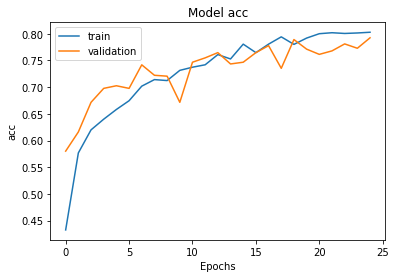

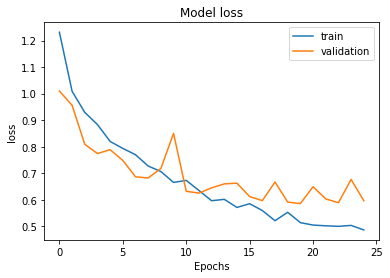

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 37s 1s/step - loss: 1.2008 - acc: 0.4408 - val_loss: 0.9797 - val_acc: 0.5784
Epoch 2/50
35/35 [==============================] - 35s 992ms/step - loss: 0.9852 - acc: 0.5882 - val_loss: 0.8854 - val_acc: 0.6275
Epoch 3/50
35/35 [==============================] - 35s 994ms/step - loss: 0.9702 - acc: 0.5833 - val_loss: 0.9016 - val_acc: 0.6389
Epoch 4/50
35/35 [==============================] - 35s 1s/step - loss: 0.9085 - acc: 0.6213 - val_loss: 0.8517 - val_acc: 0.6536
Epoch 5/50
35/35 [==============================] - 35s 994ms/step - loss: 0.8663 - acc: 0.6552 - val_loss: 0.7939 - val_acc: 0.7042
Epoch 6/50
35/35 [==============================] - 35s 994ms/step - loss: 0.8308 - acc: 0.6601 - val_loss: 0.7693 - val_acc: 0.7092
Epoch 7/50
35/35 [==============================] - 35s 994ms/step - loss: 0.8104 - 

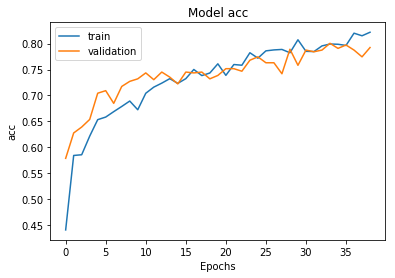

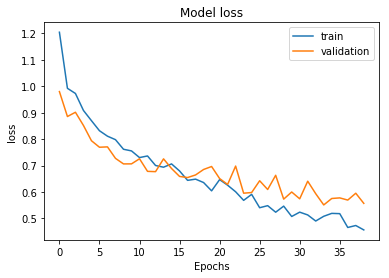

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 18s 129ms/step - loss: 1.2159 - acc: 0.4115 - val_loss: 0.9879 - val_acc: 0.5539
Epoch 2/50
138/138 [==============================] - 17s 123ms/step - loss: 1.0099 - acc: 0.5521 - val_loss: 0.8885 - val_acc: 0.6225
Epoch 3/50
138/138 [==============================] - 17s 121ms/step - loss: 0.9138 - acc: 0.6045 - val_loss: 0.8236 - val_acc: 0.6275
Epoch 4/50
138/138 [==============================] - 17s 122ms/step - loss: 0.8651 - acc: 0.6184 - val_loss: 0.9302 - val_acc: 0.5980
Epoch 5/50
138/138 [==============================] - 17s 120ms/step - loss: 0.8618 - acc: 0.6252 - val_loss: 0.7971 - val_acc: 0.6438
Epoch 6/50
138/138 [==============================] - 17s 124ms/step - loss: 0.8143 - acc: 0.6455 - val_loss: 0.7797 - val_acc: 0.6683
Epoch 7/50
138/138 [==============================] - 17s 121ms/st

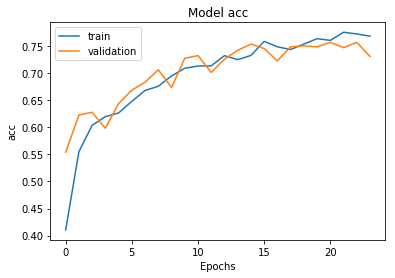

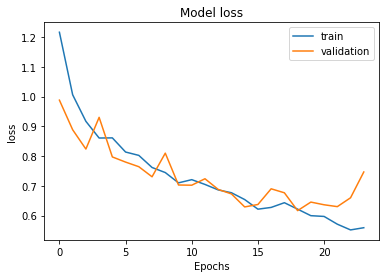

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 16s 237ms/step - loss: 1.2450 - acc: 0.3860 - val_loss: 1.0544 - val_acc: 0.5261
Epoch 2/50
69/69 [==============================] - 15s 223ms/step - loss: 1.0109 - acc: 0.5542 - val_loss: 0.9125 - val_acc: 0.6307
Epoch 3/50
69/69 [==============================] - 16s 230ms/step - loss: 0.9366 - acc: 0.5946 - val_loss: 0.8705 - val_acc: 0.6389
Epoch 4/50
69/69 [==============================] - 15s 218ms/step - loss: 0.9054 - acc: 0.6167 - val_loss: 0.9398 - val_acc: 0.5899
Epoch 5/50
69/69 [==============================] - 15s 222ms/step - loss: 0.8639 - acc: 0.6177 - val_loss: 0.8878 - val_acc: 0.6062
Epoch 6/50
69/69 [==============================] - 15s 222ms/step - loss: 0.8304 - acc: 0.6455 - val_loss: 0.7991 - val_acc: 0.6487
Epoch 7/50
69/69 [==============================] - 15s 223ms/step - loss: 0.8

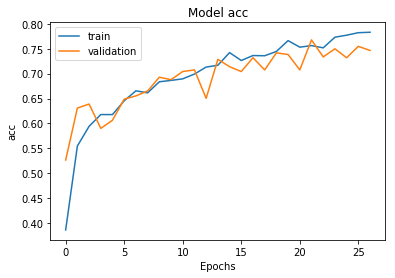

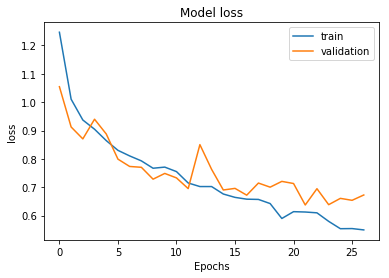

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 15s 440ms/step - loss: 1.2903 - acc: 0.3702 - val_loss: 1.1364 - val_acc: 0.4542
Epoch 2/50
35/35 [==============================] - 15s 418ms/step - loss: 1.0827 - acc: 0.5060 - val_loss: 0.9255 - val_acc: 0.6242
Epoch 3/50
35/35 [==============================] - 15s 415ms/step - loss: 0.9686 - acc: 0.5793 - val_loss: 1.0179 - val_acc: 0.5850
Epoch 4/50
35/35 [==============================] - 15s 415ms/step - loss: 0.9412 - acc: 0.5949 - val_loss: 0.8672 - val_acc: 0.6029
Epoch 5/50
35/35 [==============================] - 15s 416ms/step - loss: 0.8858 - acc: 0.6172 - val_loss: 0.8487 - val_acc: 0.6324
Epoch 6/50
35/35 [==============================] - 15s 415ms/step - loss: 0.8807 - acc: 0.6244 - val_loss: 0.8439 - val_acc: 0.6176
Epoch 7/50
35/35 [==============================] - 14s 413ms/step - loss: 0.8

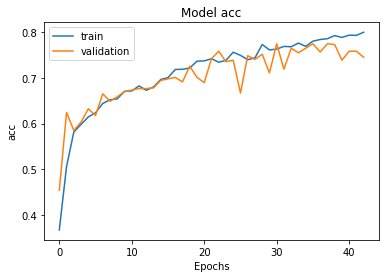

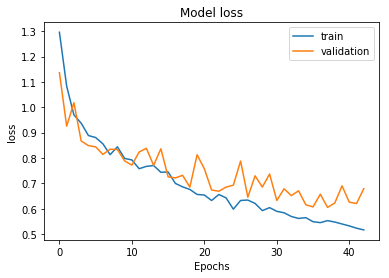

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 41s 295ms/step - loss: 1.1525 - acc: 0.4737 - val_loss: 0.9229 - val_acc: 0.5964
Epoch 2/50
138/138 [==============================] - 39s 284ms/step - loss: 0.9549 - acc: 0.5936 - val_loss: 0.8547 - val_acc: 0.6536
Epoch 3/50
138/138 [==============================] - 39s 282ms/step - loss: 0.8692 - acc: 0.6451 - val_loss: 0.8341 - val_acc: 0.6732
Epoch 4/50
138/138 [==============================] - 39s 282ms/step - loss: 0.8140 - acc: 0.6570 - val_loss: 0.8000 - val_acc: 0.6830
Epoch 5/50
138/138 [==============================] - 39s 285ms/step - loss: 0.7857 - acc: 0.6778 - val_loss: 0.8146 - val_acc: 0.6601
Epoch 6/50
138/138 [==============================] - 40s 292ms/step - loss: 0.7823 - acc: 0.6855 - val_loss: 0.7136 - val_acc: 0.7206
Epoch 7/50
138/138 [==============================] - 39s 283ms/st

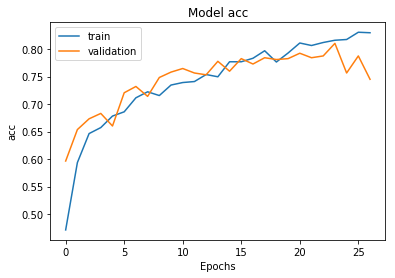

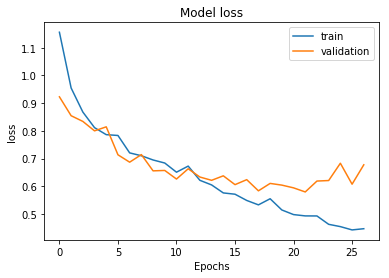

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 39s 561ms/step - loss: 1.2995 - acc: 0.3692 - val_loss: 1.1458 - val_acc: 0.4608
Epoch 2/50
69/69 [==============================] - 36s 529ms/step - loss: 1.0678 - acc: 0.5162 - val_loss: 0.9695 - val_acc: 0.5703
Epoch 3/50
69/69 [==============================] - 37s 534ms/step - loss: 0.9359 - acc: 0.5984 - val_loss: 0.8080 - val_acc: 0.6373
Epoch 4/50
69/69 [==============================] - 37s 535ms/step - loss: 0.8528 - acc: 0.6331 - val_loss: 0.8027 - val_acc: 0.6716
Epoch 5/50
69/69 [==============================] - 36s 527ms/step - loss: 0.7985 - acc: 0.6711 - val_loss: 0.7351 - val_acc: 0.7075
Epoch 6/50
69/69 [==============================] - 37s 531ms/step - loss: 0.7975 - acc: 0.6720 - val_loss: 0.7251 - val_acc: 0.7255
Epoch 7/50
69/69 [==============================] - 37s 532ms/step - loss: 0.7

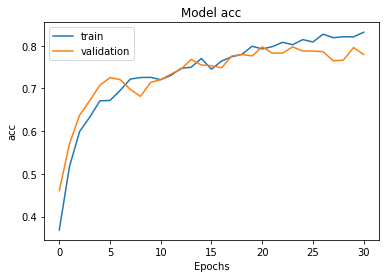

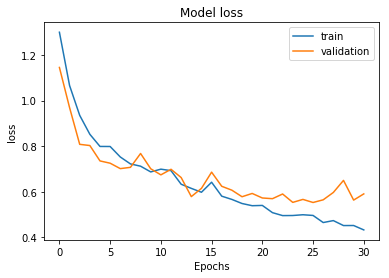

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 38s 1s/step - loss: 1.2707 - acc: 0.3868 - val_loss: 1.1959 - val_acc: 0.5016
Epoch 2/50
35/35 [==============================] - 36s 1s/step - loss: 1.0254 - acc: 0.5547 - val_loss: 0.8791 - val_acc: 0.6503
Epoch 3/50
35/35 [==============================] - 36s 1s/step - loss: 0.9489 - acc: 0.6039 - val_loss: 0.8470 - val_acc: 0.6520
Epoch 4/50
35/35 [==============================] - 36s 1s/step - loss: 0.8610 - acc: 0.6378 - val_loss: 0.7984 - val_acc: 0.6650
Epoch 5/50
35/35 [==============================] - 36s 1s/step - loss: 0.8589 - acc: 0.6360 - val_loss: 0.7597 - val_acc: 0.6895
Epoch 6/50
35/35 [==============================] - 36s 1s/step - loss: 0.8084 - acc: 0.6637 - val_loss: 0.7613 - val_acc: 0.6699
Epoch 7/50
35/35 [==============================] - 36s 1s/step - loss: 0.7648 - acc: 0.6896 - v

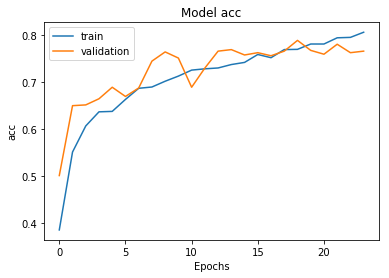

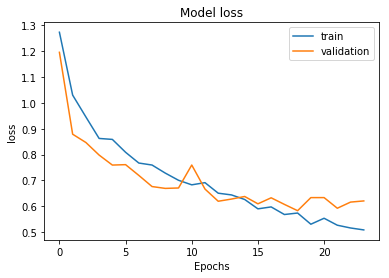

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 24s 176ms/step - loss: 1.2346 - acc: 0.4957 - val_loss: 0.9408 - val_acc: 0.6242
Epoch 2/50
138/138 [==============================] - 23s 165ms/step - loss: 0.9728 - acc: 0.6054 - val_loss: 0.9065 - val_acc: 0.6618
Epoch 3/50
138/138 [==============================] - 23s 164ms/step - loss: 0.9427 - acc: 0.6184 - val_loss: 0.8154 - val_acc: 0.6912
Epoch 4/50
138/138 [==============================] - 23s 168ms/step - loss: 0.8784 - acc: 0.6519 - val_loss: 0.7728 - val_acc: 0.7026
Epoch 5/50
138/138 [==============================] - 23s 166ms/step - loss: 0.8661 - acc: 0.6564 - val_loss: 0.7397 - val_acc: 0.7124
Epoch 6/50
138/138 [==============================] - 23s 164ms/step - loss: 0.7989 - acc: 0.6764 - val_loss: 0.9428 - val_acc: 0.6634
Epoch 7/50
138/138 [==============================] - 22s 161ms/st

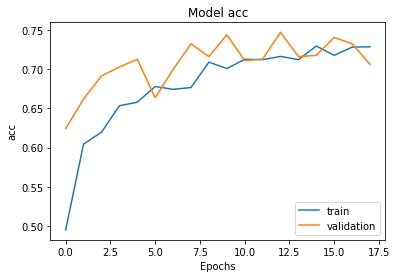

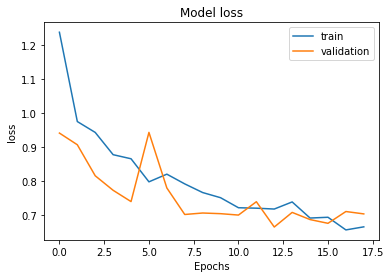

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 20s 283ms/step - loss: 1.3582 - acc: 0.4643 - val_loss: 1.0278 - val_acc: 0.5441
Epoch 2/50
69/69 [==============================] - 18s 265ms/step - loss: 1.0060 - acc: 0.5851 - val_loss: 0.9007 - val_acc: 0.6291
Epoch 3/50
69/69 [==============================] - 19s 271ms/step - loss: 0.9671 - acc: 0.5925 - val_loss: 0.8622 - val_acc: 0.6732
Epoch 4/50
69/69 [==============================] - 18s 266ms/step - loss: 0.9416 - acc: 0.6000 - val_loss: 0.9043 - val_acc: 0.6405
Epoch 5/50
69/69 [==============================] - 18s 264ms/step - loss: 0.9043 - acc: 0.6279 - val_loss: 0.7931 - val_acc: 0.6928
Epoch 6/50
69/69 [==============================] - 19s 269ms/step - loss: 0.8828 - acc: 0.6385 - val_loss: 0.8158 - val_acc: 0.6699
Epoch 7/50
69/69 [==============================] - 18s 262ms/step - loss: 0.8

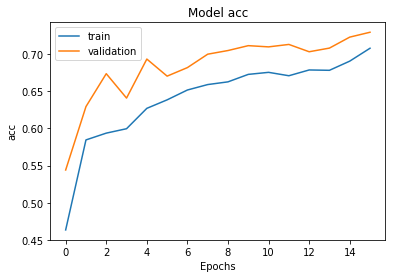

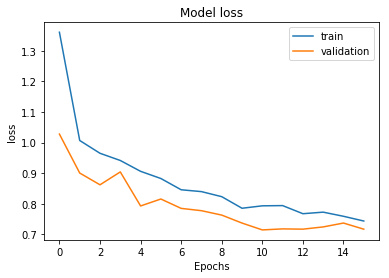

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 17s 489ms/step - loss: 1.4603 - acc: 0.4149 - val_loss: 0.9963 - val_acc: 0.5866
Epoch 2/50
35/35 [==============================] - 16s 455ms/step - loss: 1.0448 - acc: 0.5440 - val_loss: 1.0080 - val_acc: 0.5637
Epoch 3/50
35/35 [==============================] - 16s 459ms/step - loss: 1.0200 - acc: 0.5703 - val_loss: 0.8836 - val_acc: 0.6503
Epoch 4/50
35/35 [==============================] - 16s 461ms/step - loss: 0.9769 - acc: 0.6039 - val_loss: 0.8471 - val_acc: 0.6716
Epoch 5/50
35/35 [==============================] - 16s 457ms/step - loss: 0.9410 - acc: 0.6221 - val_loss: 0.8391 - val_acc: 0.6650
Epoch 6/50
35/35 [==============================] - 16s 458ms/step - loss: 0.9203 - acc: 0.6235 - val_loss: 0.8453 - val_acc: 0.6716
Epoch 7/50
35/35 [==============================] - 16s 465ms/step - loss: 0.8

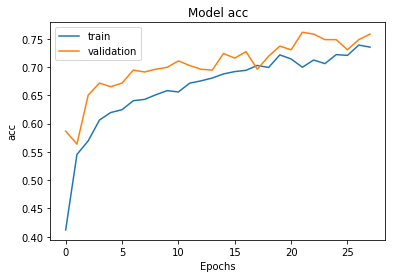

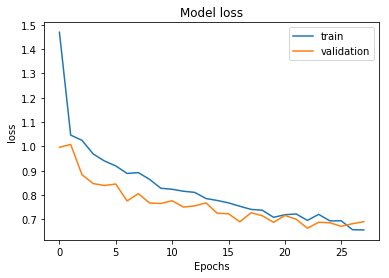

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 67s 488ms/step - loss: 4.2090 - acc: 0.4474 - val_loss: 1.0494 - val_acc: 0.5507
Epoch 2/50
138/138 [==============================] - 66s 478ms/step - loss: 1.0459 - acc: 0.5995 - val_loss: 0.9613 - val_acc: 0.6242
Epoch 3/50
138/138 [==============================] - 66s 480ms/step - loss: 0.9781 - acc: 0.6072 - val_loss: 0.8245 - val_acc: 0.6699
Epoch 4/50
138/138 [==============================] - 65s 472ms/step - loss: 0.9118 - acc: 0.6383 - val_loss: 0.7860 - val_acc: 0.6732
Epoch 5/50
138/138 [==============================] - 65s 470ms/step - loss: 0.8891 - acc: 0.6520 - val_loss: 0.8018 - val_acc: 0.6846
Epoch 6/50
138/138 [==============================] - 66s 475ms/step - loss: 0.8458 - acc: 0.6592 - val_loss: 0.8086 - val_acc: 0.6634
Epoch 7/50
138/138 [==============================] - 66s 478ms/st

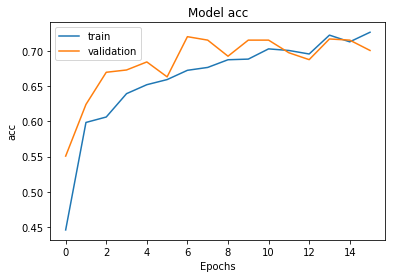

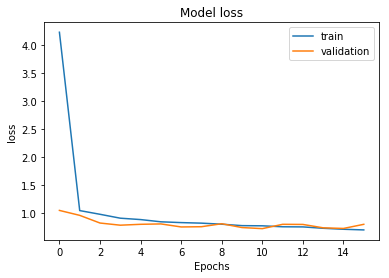

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 52s 754ms/step - loss: 2.2964 - acc: 0.4761 - val_loss: 0.9142 - val_acc: 0.6405
Epoch 2/50
69/69 [==============================] - 49s 711ms/step - loss: 1.0065 - acc: 0.5936 - val_loss: 0.8668 - val_acc: 0.6748
Epoch 3/50
69/69 [==============================] - 49s 708ms/step - loss: 0.9316 - acc: 0.6222 - val_loss: 0.7933 - val_acc: 0.7042
Epoch 4/50
69/69 [==============================] - 49s 708ms/step - loss: 0.8902 - acc: 0.6519 - val_loss: 0.7556 - val_acc: 0.7075
Epoch 5/50
69/69 [==============================] - 49s 710ms/step - loss: 0.8677 - acc: 0.6417 - val_loss: 0.7775 - val_acc: 0.7075
Epoch 6/50
69/69 [==============================] - 49s 708ms/step - loss: 0.8210 - acc: 0.6652 - val_loss: 0.7313 - val_acc: 0.7042
Epoch 7/50
69/69 [==============================] - 49s 707ms/step - loss: 0.8

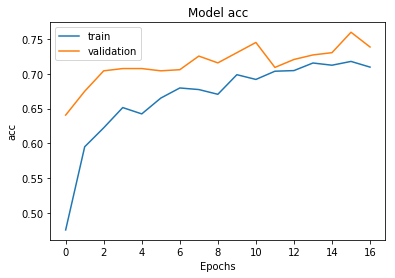

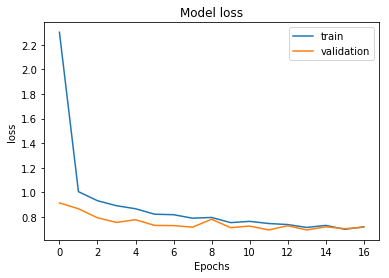

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 44s 1s/step - loss: 4.4678 - acc: 0.3484 - val_loss: 1.1549 - val_acc: 0.5000
Epoch 2/50
35/35 [==============================] - 41s 1s/step - loss: 1.1349 - acc: 0.5221 - val_loss: 0.9887 - val_acc: 0.5735
Epoch 3/50
35/35 [==============================] - 41s 1s/step - loss: 1.0383 - acc: 0.5668 - val_loss: 0.9164 - val_acc: 0.6552
Epoch 4/50
35/35 [==============================] - 41s 1s/step - loss: 1.0178 - acc: 0.5838 - val_loss: 0.9198 - val_acc: 0.6225
Epoch 5/50
35/35 [==============================] - 41s 1s/step - loss: 0.9738 - acc: 0.6128 - val_loss: 0.8794 - val_acc: 0.6716
Epoch 6/50
35/35 [==============================] - 41s 1s/step - loss: 0.9543 - acc: 0.6070 - val_loss: 0.8567 - val_acc: 0.6422
Epoch 7/50
35/35 [==============================] - 41s 1s/step - loss: 0.9265 - acc: 0.6338 - v

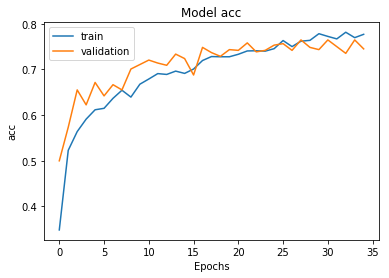

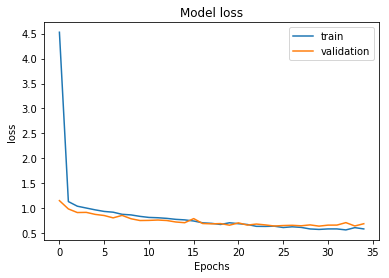

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 23s 163ms/step - loss: 1.1408 - acc: 0.4958 - val_loss: 0.9363 - val_acc: 0.6275
Epoch 2/50
138/138 [==============================] - 21s 153ms/step - loss: 0.9495 - acc: 0.6019 - val_loss: 0.8531 - val_acc: 0.6487
Epoch 3/50
138/138 [==============================] - 21s 151ms/step - loss: 0.8958 - acc: 0.6281 - val_loss: 0.7976 - val_acc: 0.6863
Epoch 4/50
138/138 [==============================] - 21s 151ms/step - loss: 0.8498 - acc: 0.6370 - val_loss: 0.7815 - val_acc: 0.6928
Epoch 5/50
138/138 [==============================] - 21s 150ms/step - loss: 0.8280 - acc: 0.6620 - val_loss: 0.7320 - val_acc: 0.7369
Epoch 6/50
138/138 [==============================] - 21s 149ms/step - loss: 0.7637 - acc: 0.6893 - val_loss: 0.6860 - val_acc: 0.7337
Epoch 7/50
138/138 [==============================] - 21s 151ms/st

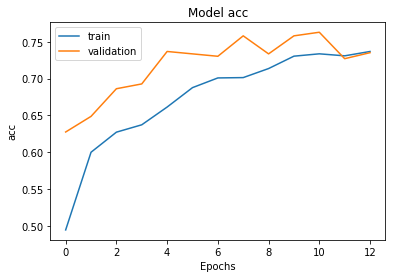

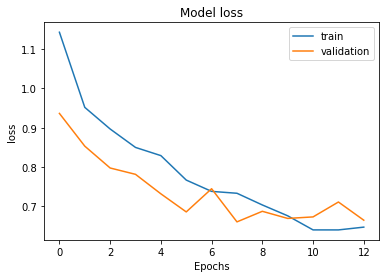

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 20s 293ms/step - loss: 1.1404 - acc: 0.4845 - val_loss: 0.9151 - val_acc: 0.6454
Epoch 2/50
69/69 [==============================] - 19s 279ms/step - loss: 0.9687 - acc: 0.6077 - val_loss: 0.8638 - val_acc: 0.6585
Epoch 3/50
69/69 [==============================] - 19s 274ms/step - loss: 0.9198 - acc: 0.6168 - val_loss: 0.8899 - val_acc: 0.6454
Epoch 4/50
69/69 [==============================] - 19s 271ms/step - loss: 0.8954 - acc: 0.6278 - val_loss: 0.8626 - val_acc: 0.6765
Epoch 5/50
69/69 [==============================] - 19s 278ms/step - loss: 0.8591 - acc: 0.6433 - val_loss: 0.8541 - val_acc: 0.6585
Epoch 6/50
69/69 [==============================] - 19s 278ms/step - loss: 0.8295 - acc: 0.6539 - val_loss: 0.7980 - val_acc: 0.6830
Epoch 7/50
69/69 [==============================] - 19s 273ms/step - loss: 0.8

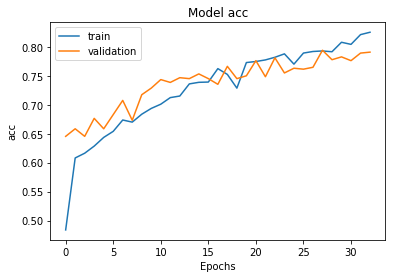

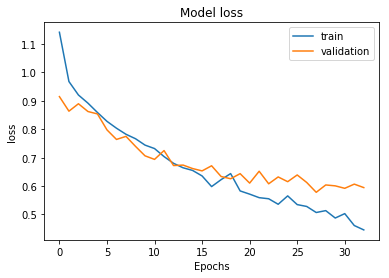

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 19s 542ms/step - loss: 1.2441 - acc: 0.4283 - val_loss: 0.9397 - val_acc: 0.6373
Epoch 2/50
35/35 [==============================] - 17s 499ms/step - loss: 0.9835 - acc: 0.5900 - val_loss: 0.8843 - val_acc: 0.6291
Epoch 3/50
35/35 [==============================] - 18s 506ms/step - loss: 0.9329 - acc: 0.6034 - val_loss: 0.8253 - val_acc: 0.6765
Epoch 4/50
35/35 [==============================] - 18s 510ms/step - loss: 0.8739 - acc: 0.6431 - val_loss: 0.8585 - val_acc: 0.6536
Epoch 5/50
35/35 [==============================] - 18s 514ms/step - loss: 0.8614 - acc: 0.6422 - val_loss: 0.7857 - val_acc: 0.6797
Epoch 6/50
35/35 [==============================] - 18s 509ms/step - loss: 0.8097 - acc: 0.6650 - val_loss: 0.7698 - val_acc: 0.6748
Epoch 7/50
35/35 [==============================] - 18s 509ms/step - loss: 0.7

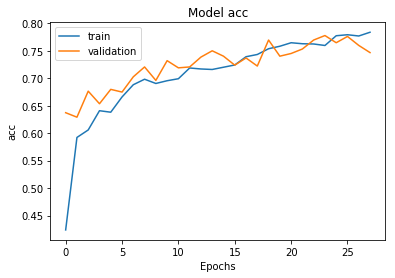

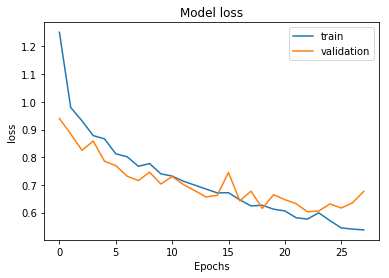

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 58s 423ms/step - loss: 1.1839 - acc: 0.4982 - val_loss: 0.9297 - val_acc: 0.5931
Epoch 2/50
138/138 [==============================] - 56s 408ms/step - loss: 0.9515 - acc: 0.6157 - val_loss: 0.9052 - val_acc: 0.6503
Epoch 3/50
138/138 [==============================] - 56s 409ms/step - loss: 0.8761 - acc: 0.6371 - val_loss: 0.7779 - val_acc: 0.7026
Epoch 4/50
138/138 [==============================] - 56s 407ms/step - loss: 0.8677 - acc: 0.6466 - val_loss: 0.7425 - val_acc: 0.7206
Epoch 5/50
138/138 [==============================] - 56s 407ms/step - loss: 0.8157 - acc: 0.6722 - val_loss: 0.7704 - val_acc: 0.6797
Epoch 6/50
138/138 [==============================] - 56s 407ms/step - loss: 0.7888 - acc: 0.6829 - val_loss: 0.7356 - val_acc: 0.7288
Epoch 7/50
138/138 [==============================] - 56s 408ms/st

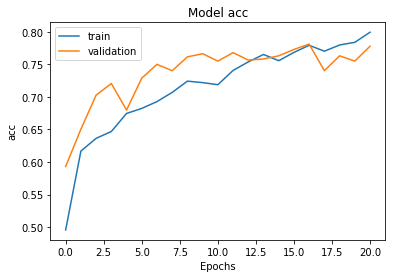

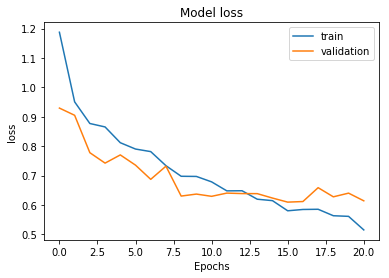

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 54s 790ms/step - loss: 1.2155 - acc: 0.4703 - val_loss: 0.9573 - val_acc: 0.5376
Epoch 2/50
69/69 [==============================] - 52s 753ms/step - loss: 0.9866 - acc: 0.5873 - val_loss: 0.9082 - val_acc: 0.6062
Epoch 3/50
69/69 [==============================] - 52s 756ms/step - loss: 0.9173 - acc: 0.6322 - val_loss: 0.7941 - val_acc: 0.6961
Epoch 4/50
69/69 [==============================] - 52s 758ms/step - loss: 0.8638 - acc: 0.6390 - val_loss: 0.8306 - val_acc: 0.6569
Epoch 5/50
69/69 [==============================] - 52s 752ms/step - loss: 0.8392 - acc: 0.6498 - val_loss: 0.7624 - val_acc: 0.7157
Epoch 6/50
69/69 [==============================] - 52s 751ms/step - loss: 0.8048 - acc: 0.6668 - val_loss: 0.7468 - val_acc: 0.7222
Epoch 7/50
69/69 [==============================] - 52s 752ms/step - loss: 0.7

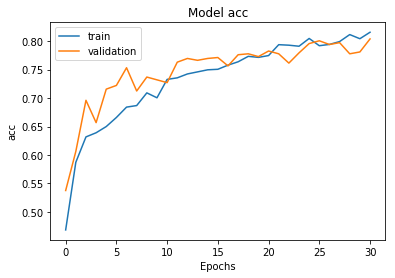

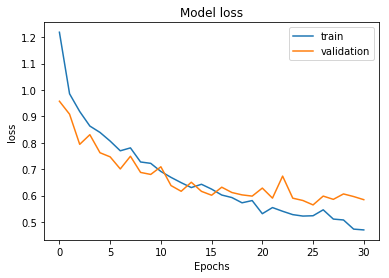

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 54s 2s/step - loss: 1.2027 - acc: 0.4801 - val_loss: 0.9486 - val_acc: 0.6307
Epoch 2/50
35/35 [==============================] - 50s 1s/step - loss: 0.9723 - acc: 0.5909 - val_loss: 0.8725 - val_acc: 0.6471
Epoch 3/50
35/35 [==============================] - 50s 1s/step - loss: 0.9070 - acc: 0.6141 - val_loss: 0.8311 - val_acc: 0.6536
Epoch 4/50
35/35 [==============================] - 50s 1s/step - loss: 0.8787 - acc: 0.6561 - val_loss: 0.7722 - val_acc: 0.7042
Epoch 5/50
35/35 [==============================] - 50s 1s/step - loss: 0.8348 - acc: 0.6530 - val_loss: 0.7716 - val_acc: 0.7108
Epoch 6/50
35/35 [==============================] - 50s 1s/step - loss: 0.7725 - acc: 0.6990 - val_loss: 0.7428 - val_acc: 0.7075
Epoch 7/50
35/35 [==============================] - 50s 1s/step - loss: 0.7574 - acc: 0.7012 - v

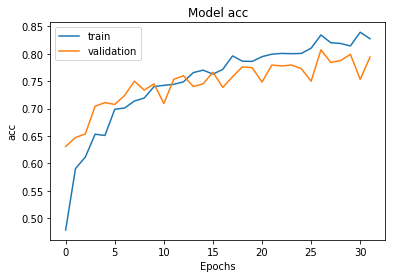

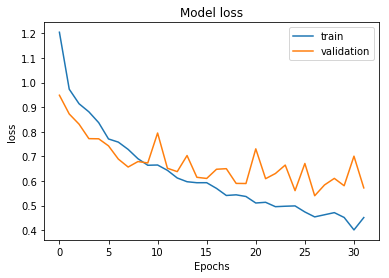

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 23s 168ms/step - loss: 1.1844 - acc: 0.4517 - val_loss: 1.0019 - val_acc: 0.5866
Epoch 2/50
138/138 [==============================] - 21s 152ms/step - loss: 0.9885 - acc: 0.5783 - val_loss: 0.8483 - val_acc: 0.6454
Epoch 3/50
138/138 [==============================] - 21s 153ms/step - loss: 0.9426 - acc: 0.6132 - val_loss: 0.7972 - val_acc: 0.6683
Epoch 4/50
138/138 [==============================] - 22s 156ms/step - loss: 0.8328 - acc: 0.6489 - val_loss: 0.7555 - val_acc: 0.6814
Epoch 5/50
138/138 [==============================] - 21s 151ms/step - loss: 0.7959 - acc: 0.6629 - val_loss: 0.7599 - val_acc: 0.6944
Epoch 6/50
138/138 [==============================] - 21s 154ms/step - loss: 0.7935 - acc: 0.6779 - val_loss: 0.7059 - val_acc: 0.7222
Epoch 7/50
138/138 [==============================] - 21s 153ms/st

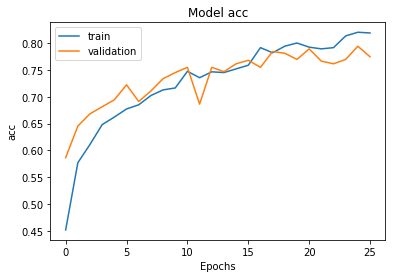

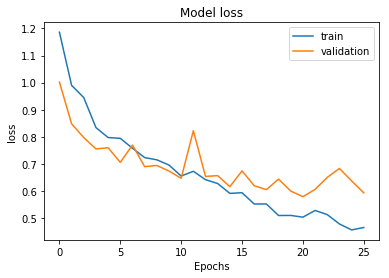

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 21s 311ms/step - loss: 1.1787 - acc: 0.4646 - val_loss: 0.9237 - val_acc: 0.5539
Epoch 2/50
69/69 [==============================] - 20s 285ms/step - loss: 0.9889 - acc: 0.5737 - val_loss: 0.8984 - val_acc: 0.5948
Epoch 3/50
69/69 [==============================] - 19s 280ms/step - loss: 0.9144 - acc: 0.6009 - val_loss: 0.8079 - val_acc: 0.6650
Epoch 4/50
69/69 [==============================] - 20s 284ms/step - loss: 0.8859 - acc: 0.6242 - val_loss: 0.8491 - val_acc: 0.6487
Epoch 5/50
69/69 [==============================] - 19s 281ms/step - loss: 0.8367 - acc: 0.6621 - val_loss: 0.7966 - val_acc: 0.6389
Epoch 6/50
69/69 [==============================] - 20s 285ms/step - loss: 0.8192 - acc: 0.6711 - val_loss: 0.7221 - val_acc: 0.7271
Epoch 7/50
69/69 [==============================] - 19s 282ms/step - loss: 0.7

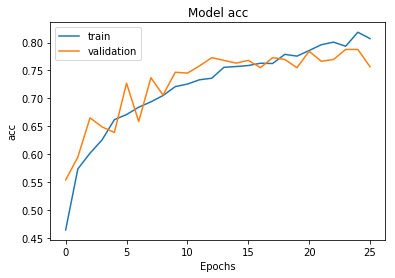

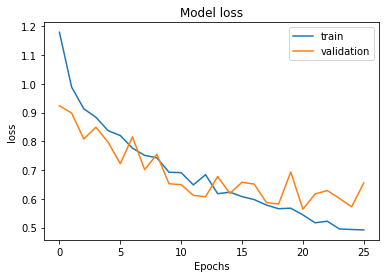

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 20s 572ms/step - loss: 1.2158 - acc: 0.4390 - val_loss: 1.1210 - val_acc: 0.4510
Epoch 2/50
35/35 [==============================] - 18s 526ms/step - loss: 1.0073 - acc: 0.5677 - val_loss: 0.9249 - val_acc: 0.6111
Epoch 3/50
35/35 [==============================] - 19s 529ms/step - loss: 0.9310 - acc: 0.6012 - val_loss: 0.8445 - val_acc: 0.6438
Epoch 4/50
35/35 [==============================] - 18s 528ms/step - loss: 0.8913 - acc: 0.6226 - val_loss: 0.7661 - val_acc: 0.6912
Epoch 5/50
35/35 [==============================] - 19s 535ms/step - loss: 0.8517 - acc: 0.6521 - val_loss: 0.7611 - val_acc: 0.6879
Epoch 6/50
35/35 [==============================] - 19s 537ms/step - loss: 0.8146 - acc: 0.6579 - val_loss: 0.8827 - val_acc: 0.6536
Epoch 7/50
35/35 [==============================] - 19s 531ms/step - loss: 0.8

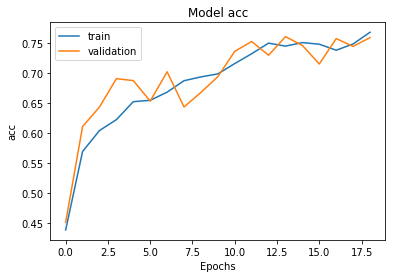

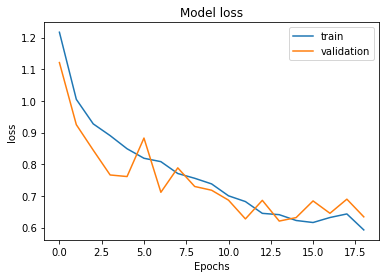

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 61s 440ms/step - loss: 1.1816 - acc: 0.4700 - val_loss: 0.9426 - val_acc: 0.6144
Epoch 2/50
138/138 [==============================] - 58s 423ms/step - loss: 0.9734 - acc: 0.6023 - val_loss: 0.8196 - val_acc: 0.6797
Epoch 3/50
138/138 [==============================] - 59s 424ms/step - loss: 0.9088 - acc: 0.6290 - val_loss: 0.8215 - val_acc: 0.6552
Epoch 4/50
138/138 [==============================] - 58s 423ms/step - loss: 0.8462 - acc: 0.6480 - val_loss: 0.7463 - val_acc: 0.6977
Epoch 5/50
138/138 [==============================] - 58s 421ms/step - loss: 0.7959 - acc: 0.6724 - val_loss: 0.7830 - val_acc: 0.6781
Epoch 6/50
138/138 [==============================] - 58s 422ms/step - loss: 0.7680 - acc: 0.6883 - val_loss: 0.6899 - val_acc: 0.7337
Epoch 7/50
138/138 [==============================] - 58s 422ms/st

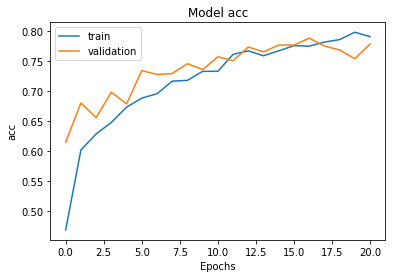

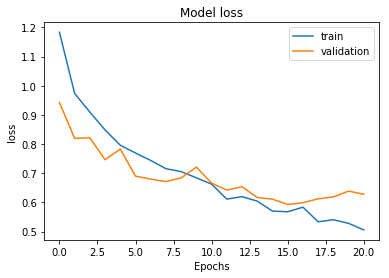

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 59s 853ms/step - loss: 1.1984 - acc: 0.4501 - val_loss: 1.0254 - val_acc: 0.5719
Epoch 2/50
69/69 [==============================] - 56s 810ms/step - loss: 0.9734 - acc: 0.5966 - val_loss: 0.8906 - val_acc: 0.6438
Epoch 3/50
69/69 [==============================] - 56s 809ms/step - loss: 0.8974 - acc: 0.6351 - val_loss: 0.7723 - val_acc: 0.7141
Epoch 4/50
69/69 [==============================] - 56s 810ms/step - loss: 0.8441 - acc: 0.6541 - val_loss: 0.7304 - val_acc: 0.7124
Epoch 5/50
69/69 [==============================] - 56s 809ms/step - loss: 0.8031 - acc: 0.6661 - val_loss: 0.7414 - val_acc: 0.7239
Epoch 6/50
69/69 [==============================] - 56s 808ms/step - loss: 0.7423 - acc: 0.7049 - val_loss: 0.6838 - val_acc: 0.7516
Epoch 7/50
69/69 [==============================] - 56s 813ms/step - loss: 0.7

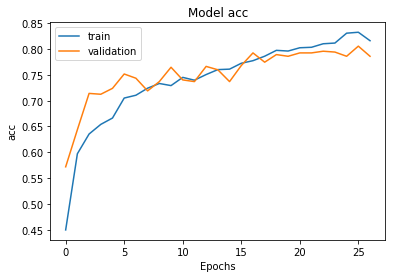

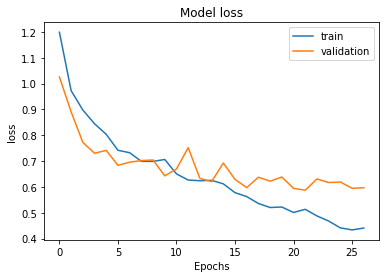

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 59s 2s/step - loss: 1.2282 - acc: 0.4413 - val_loss: 0.9770 - val_acc: 0.5703
Epoch 2/50
35/35 [==============================] - 55s 2s/step - loss: 1.0354 - acc: 0.5570 - val_loss: 0.8897 - val_acc: 0.6454
Epoch 3/50
35/35 [==============================] - 55s 2s/step - loss: 0.9380 - acc: 0.6208 - val_loss: 0.8714 - val_acc: 0.6471
Epoch 4/50
35/35 [==============================] - 55s 2s/step - loss: 0.8639 - acc: 0.6521 - val_loss: 0.7632 - val_acc: 0.6912
Epoch 5/50
35/35 [==============================] - 55s 2s/step - loss: 0.8355 - acc: 0.6543 - val_loss: 0.7668 - val_acc: 0.6993
Epoch 6/50
35/35 [==============================] - 55s 2s/step - loss: 0.7906 - acc: 0.6869 - val_loss: 0.7124 - val_acc: 0.7124
Epoch 7/50
35/35 [==============================] - 55s 2s/step - loss: 0.7670 - acc: 0.6941 - v

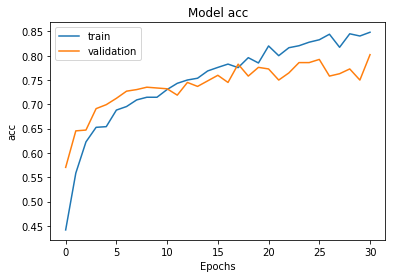

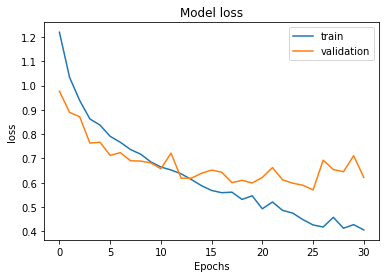

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 25s 182ms/step - loss: 1.1451 - acc: 0.4804 - val_loss: 0.9159 - val_acc: 0.5964
Epoch 2/50
138/138 [==============================] - 23s 166ms/step - loss: 0.9647 - acc: 0.5626 - val_loss: 0.9416 - val_acc: 0.5588
Epoch 3/50
138/138 [==============================] - 25s 178ms/step - loss: 0.9292 - acc: 0.5882 - val_loss: 0.8998 - val_acc: 0.6111
Epoch 4/50
138/138 [==============================] - 24s 173ms/step - loss: 0.8512 - acc: 0.6272 - val_loss: 0.7995 - val_acc: 0.6552
Epoch 5/50
138/138 [==============================] - 23s 170ms/step - loss: 0.8177 - acc: 0.6497 - val_loss: 0.7707 - val_acc: 0.6928
Epoch 6/50
138/138 [==============================] - 23s 164ms/step - loss: 0.8329 - acc: 0.6401 - val_loss: 0.7446 - val_acc: 0.6961
Epoch 7/50
138/138 [==============================] - 24s 176ms/st

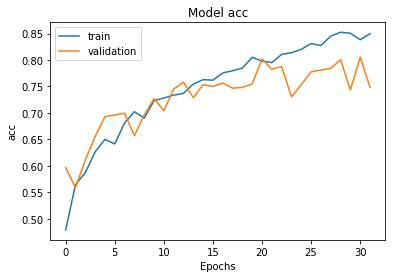

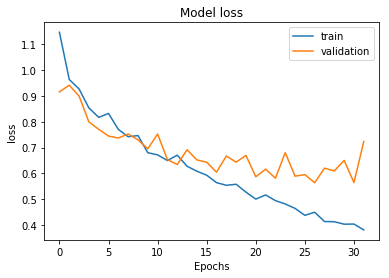

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 22s 321ms/step - loss: 1.1921 - acc: 0.4433 - val_loss: 0.9809 - val_acc: 0.5523
Epoch 2/50
69/69 [==============================] - 20s 289ms/step - loss: 0.9981 - acc: 0.5549 - val_loss: 0.9534 - val_acc: 0.5833
Epoch 3/50
69/69 [==============================] - 20s 292ms/step - loss: 0.9286 - acc: 0.5991 - val_loss: 1.0260 - val_acc: 0.5686
Epoch 4/50
69/69 [==============================] - 20s 286ms/step - loss: 0.9168 - acc: 0.5959 - val_loss: 0.8342 - val_acc: 0.6536
Epoch 5/50
69/69 [==============================] - 20s 287ms/step - loss: 0.8543 - acc: 0.6254 - val_loss: 0.8046 - val_acc: 0.6634
Epoch 6/50
69/69 [==============================] - 20s 291ms/step - loss: 0.8302 - acc: 0.6535 - val_loss: 0.7877 - val_acc: 0.6699
Epoch 7/50
69/69 [==============================] - 20s 287ms/step - loss: 0.8

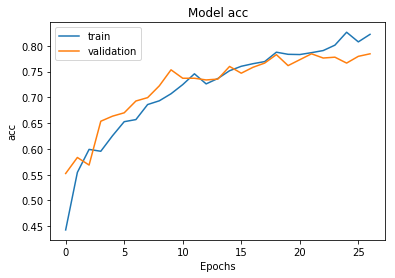

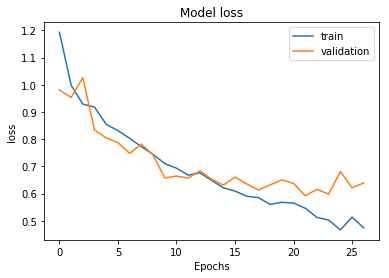

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 21s 589ms/step - loss: 1.2203 - acc: 0.4323 - val_loss: 1.0247 - val_acc: 0.5539
Epoch 2/50
35/35 [==============================] - 19s 542ms/step - loss: 1.0270 - acc: 0.5565 - val_loss: 0.9502 - val_acc: 0.5997
Epoch 3/50
35/35 [==============================] - 19s 544ms/step - loss: 0.9450 - acc: 0.5851 - val_loss: 1.0071 - val_acc: 0.5817
Epoch 4/50
35/35 [==============================] - 19s 554ms/step - loss: 0.9170 - acc: 0.6106 - val_loss: 0.9015 - val_acc: 0.6111
Epoch 5/50
35/35 [==============================] - 19s 543ms/step - loss: 0.8730 - acc: 0.6302 - val_loss: 0.8047 - val_acc: 0.6487
Epoch 6/50
35/35 [==============================] - 19s 543ms/step - loss: 0.8392 - acc: 0.6431 - val_loss: 0.8438 - val_acc: 0.6503
Epoch 7/50
35/35 [==============================] - 19s 551ms/step - loss: 0.8

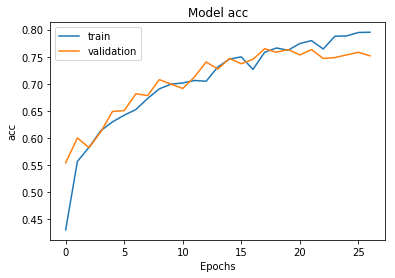

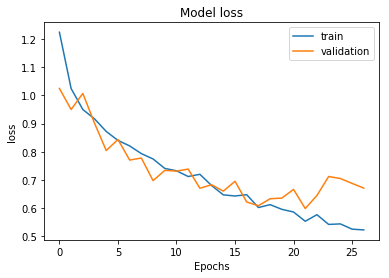

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 64s 464ms/step - loss: 1.1454 - acc: 0.4822 - val_loss: 0.9603 - val_acc: 0.5670
Epoch 2/50
138/138 [==============================] - 61s 443ms/step - loss: 0.9725 - acc: 0.5937 - val_loss: 0.8324 - val_acc: 0.6356
Epoch 3/50
138/138 [==============================] - 61s 442ms/step - loss: 0.9026 - acc: 0.6194 - val_loss: 0.8428 - val_acc: 0.6634
Epoch 4/50
138/138 [==============================] - 60s 436ms/step - loss: 0.8248 - acc: 0.6578 - val_loss: 1.0257 - val_acc: 0.5980
Epoch 5/50
138/138 [==============================] - 60s 438ms/step - loss: 0.8039 - acc: 0.6817 - val_loss: 0.7509 - val_acc: 0.7075
Epoch 6/50
138/138 [==============================] - 61s 445ms/step - loss: 0.7309 - acc: 0.7073 - val_loss: 0.7054 - val_acc: 0.7304
Epoch 7/50
138/138 [==============================] - 60s 436ms/st

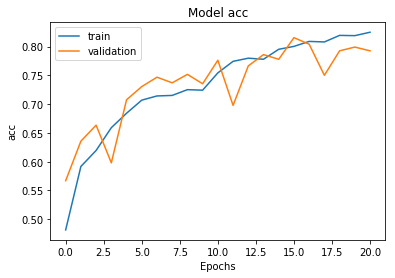

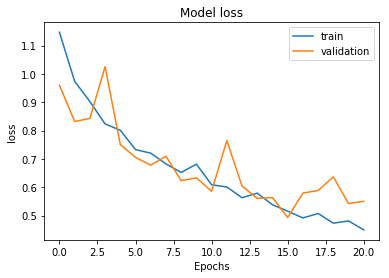

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 62s 902ms/step - loss: 1.2216 - acc: 0.4286 - val_loss: 0.9468 - val_acc: 0.5948
Epoch 2/50
69/69 [==============================] - 59s 850ms/step - loss: 0.9792 - acc: 0.5887 - val_loss: 0.8647 - val_acc: 0.6029
Epoch 3/50
69/69 [==============================] - 59s 850ms/step - loss: 0.8803 - acc: 0.6231 - val_loss: 0.7722 - val_acc: 0.6944
Epoch 4/50
69/69 [==============================] - 59s 850ms/step - loss: 0.8222 - acc: 0.6695 - val_loss: 0.7672 - val_acc: 0.7026
Epoch 5/50
69/69 [==============================] - 59s 850ms/step - loss: 0.7943 - acc: 0.6598 - val_loss: 0.7600 - val_acc: 0.6961
Epoch 6/50
69/69 [==============================] - 59s 851ms/step - loss: 0.7828 - acc: 0.6752 - val_loss: 0.7178 - val_acc: 0.7173
Epoch 7/50
69/69 [==============================] - 58s 848ms/step - loss: 0.7

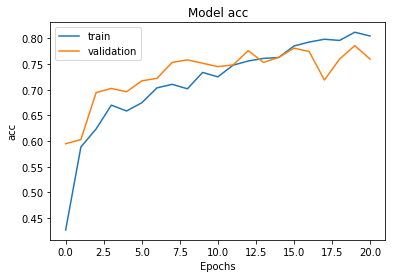

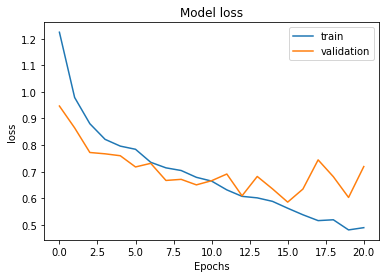

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 76s 2s/step - loss: 1.1834 - acc: 0.4680 - val_loss: 1.0506 - val_acc: 0.5310
Epoch 2/50
35/35 [==============================] - 69s 2s/step - loss: 1.0091 - acc: 0.5735 - val_loss: 0.8781 - val_acc: 0.6471
Epoch 3/50
35/35 [==============================] - 70s 2s/step - loss: 0.9236 - acc: 0.6079 - val_loss: 0.7979 - val_acc: 0.6699
Epoch 4/50
35/35 [==============================] - 69s 2s/step - loss: 0.8414 - acc: 0.6449 - val_loss: 0.8185 - val_acc: 0.6830
Epoch 5/50
35/35 [==============================] - 70s 2s/step - loss: 0.8339 - acc: 0.6521 - val_loss: 0.7561 - val_acc: 0.6993
Epoch 6/50
35/35 [==============================] - 68s 2s/step - loss: 0.7787 - acc: 0.6775 - val_loss: 0.7129 - val_acc: 0.7222
Epoch 7/50
35/35 [==============================] - 62s 2s/step - loss: 0.7762 - acc: 0.6856 - v

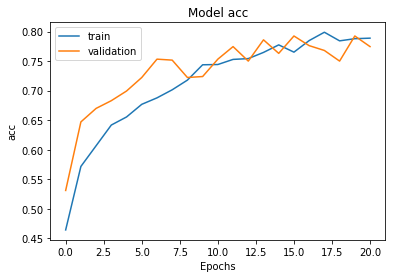

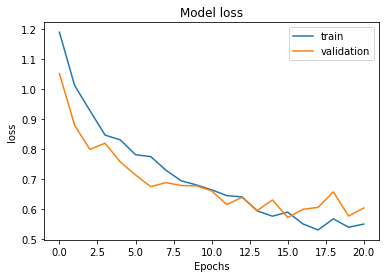

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 21s 154ms/step - loss: 1.3052 - acc: 0.4526 - val_loss: 0.9602 - val_acc: 0.6111
Epoch 2/50
138/138 [==============================] - 19s 135ms/step - loss: 1.0311 - acc: 0.5664 - val_loss: 0.8960 - val_acc: 0.6373
Epoch 3/50
138/138 [==============================] - 18s 133ms/step - loss: 0.9736 - acc: 0.5954 - val_loss: 0.8403 - val_acc: 0.6667
Epoch 4/50
138/138 [==============================] - 18s 133ms/step - loss: 0.9537 - acc: 0.6007 - val_loss: 0.8271 - val_acc: 0.6716
Epoch 5/50
138/138 [==============================] - 19s 135ms/step - loss: 0.9261 - acc: 0.6226 - val_loss: 0.8632 - val_acc: 0.6438
Epoch 6/50
138/138 [==============================] - 18s 131ms/step - loss: 0.8962 - acc: 0.6407 - val_loss: 0.7707 - val_acc: 0.6879
Epoch 7/50
138/138 [==============================] - 19s 138ms/st

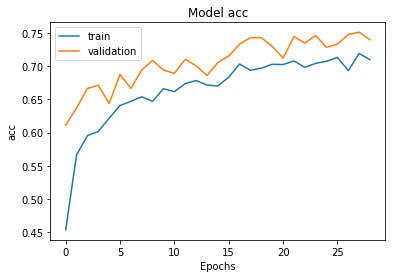

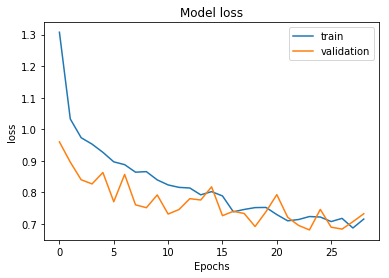

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 20s 287ms/step - loss: 1.4611 - acc: 0.4315 - val_loss: 1.0767 - val_acc: 0.5245
Epoch 2/50
69/69 [==============================] - 16s 233ms/step - loss: 1.0661 - acc: 0.5393 - val_loss: 0.9393 - val_acc: 0.6258
Epoch 3/50
69/69 [==============================] - 17s 252ms/step - loss: 1.0062 - acc: 0.5658 - val_loss: 0.9270 - val_acc: 0.6242
Epoch 4/50
69/69 [==============================] - 17s 246ms/step - loss: 0.9749 - acc: 0.5871 - val_loss: 0.8777 - val_acc: 0.6585
Epoch 5/50
69/69 [==============================] - 16s 235ms/step - loss: 0.9588 - acc: 0.5975 - val_loss: 0.8269 - val_acc: 0.7010
Epoch 6/50
69/69 [==============================] - 16s 234ms/step - loss: 0.9321 - acc: 0.6147 - val_loss: 0.8420 - val_acc: 0.6814
Epoch 7/50
69/69 [==============================] - 16s 236ms/step - loss: 0.9

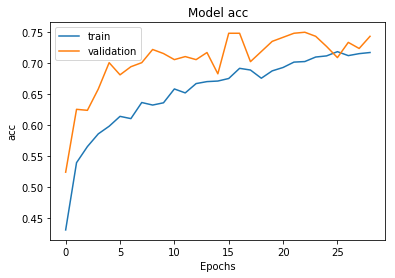

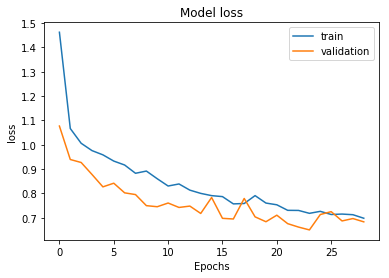

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 16s 450ms/step - loss: 1.4369 - acc: 0.3908 - val_loss: 1.0635 - val_acc: 0.5327
Epoch 2/50
35/35 [==============================] - 14s 403ms/step - loss: 1.1090 - acc: 0.5221 - val_loss: 1.0006 - val_acc: 0.5850
Epoch 3/50
35/35 [==============================] - 14s 408ms/step - loss: 1.0228 - acc: 0.5614 - val_loss: 0.9134 - val_acc: 0.6258
Epoch 4/50
35/35 [==============================] - 14s 403ms/step - loss: 1.0032 - acc: 0.5927 - val_loss: 0.8586 - val_acc: 0.6716
Epoch 5/50
35/35 [==============================] - 14s 405ms/step - loss: 0.9626 - acc: 0.5940 - val_loss: 0.8988 - val_acc: 0.6536
Epoch 6/50
35/35 [==============================] - 14s 404ms/step - loss: 0.9766 - acc: 0.5931 - val_loss: 0.8344 - val_acc: 0.6863
Epoch 7/50
35/35 [==============================] - 14s 407ms/step - loss: 0.9

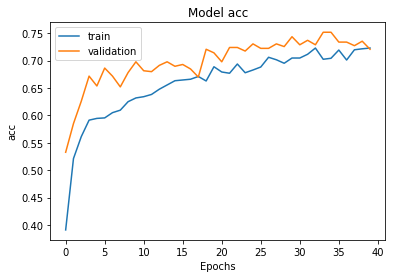

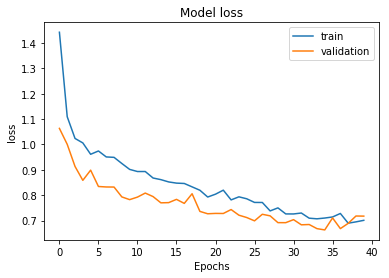

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 48s 350ms/step - loss: 3.3782 - acc: 0.4300 - val_loss: 0.9941 - val_acc: 0.5833
Epoch 2/50
138/138 [==============================] - 45s 327ms/step - loss: 1.0405 - acc: 0.5618 - val_loss: 0.8582 - val_acc: 0.6503
Epoch 3/50
138/138 [==============================] - 45s 326ms/step - loss: 0.9833 - acc: 0.5907 - val_loss: 0.8185 - val_acc: 0.6928
Epoch 4/50
138/138 [==============================] - 46s 334ms/step - loss: 0.9391 - acc: 0.6277 - val_loss: 0.8219 - val_acc: 0.6683
Epoch 5/50
138/138 [==============================] - 45s 329ms/step - loss: 0.9202 - acc: 0.6344 - val_loss: 0.8007 - val_acc: 0.6928
Epoch 6/50
138/138 [==============================] - 48s 347ms/step - loss: 0.8889 - acc: 0.6434 - val_loss: 0.7506 - val_acc: 0.7124
Epoch 7/50
138/138 [==============================] - 46s 336ms/st

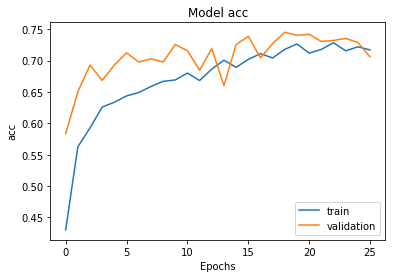

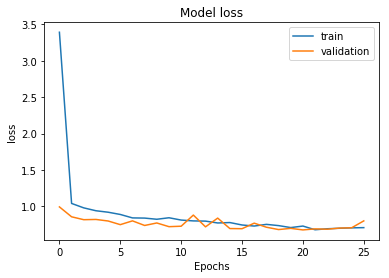

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 40s 581ms/step - loss: 6.0756 - acc: 0.3699 - val_loss: 1.1721 - val_acc: 0.4918
Epoch 2/50
69/69 [==============================] - 36s 525ms/step - loss: 1.1087 - acc: 0.5332 - val_loss: 0.9347 - val_acc: 0.6078
Epoch 3/50
69/69 [==============================] - 36s 528ms/step - loss: 0.9972 - acc: 0.5828 - val_loss: 0.9102 - val_acc: 0.6503
Epoch 4/50
69/69 [==============================] - 37s 529ms/step - loss: 0.9708 - acc: 0.6166 - val_loss: 0.8910 - val_acc: 0.6503
Epoch 5/50
69/69 [==============================] - 37s 529ms/step - loss: 0.9233 - acc: 0.6204 - val_loss: 0.8519 - val_acc: 0.6422
Epoch 6/50
69/69 [==============================] - 36s 528ms/step - loss: 0.9218 - acc: 0.6235 - val_loss: 0.8513 - val_acc: 0.6569
Epoch 7/50
69/69 [==============================] - 37s 536ms/step - loss: 0.8

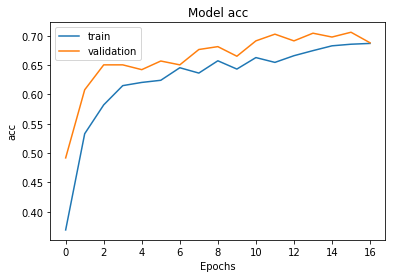

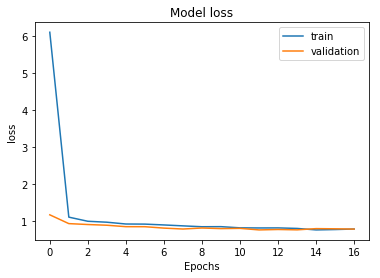

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 36s 1s/step - loss: 4.1108 - acc: 0.3372 - val_loss: 1.2021 - val_acc: 0.5131
Epoch 2/50
35/35 [==============================] - 32s 922ms/step - loss: 1.1859 - acc: 0.4667 - val_loss: 1.0108 - val_acc: 0.6275
Epoch 3/50
35/35 [==============================] - 33s 935ms/step - loss: 1.0845 - acc: 0.5342 - val_loss: 0.8973 - val_acc: 0.6471
Epoch 4/50
35/35 [==============================] - 33s 929ms/step - loss: 1.0116 - acc: 0.5659 - val_loss: 0.9068 - val_acc: 0.6176
Epoch 5/50
35/35 [==============================] - 33s 930ms/step - loss: 0.9888 - acc: 0.5958 - val_loss: 0.8193 - val_acc: 0.6895
Epoch 6/50
35/35 [==============================] - 32s 928ms/step - loss: 0.9631 - acc: 0.6119 - val_loss: 0.8152 - val_acc: 0.6601
Epoch 7/50
35/35 [==============================] - 33s 935ms/step - loss: 0.9655

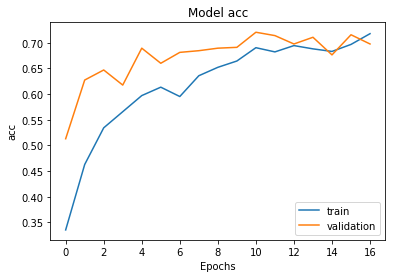

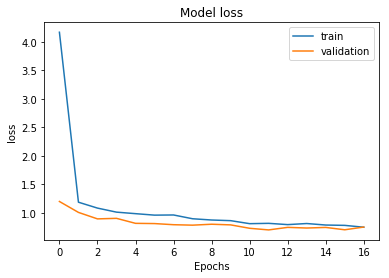

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 20s 146ms/step - loss: 1.1516 - acc: 0.4727 - val_loss: 0.9203 - val_acc: 0.6405
Epoch 2/50
138/138 [==============================] - 18s 128ms/step - loss: 0.9843 - acc: 0.5967 - val_loss: 0.8698 - val_acc: 0.6275
Epoch 3/50
138/138 [==============================] - 18s 128ms/step - loss: 0.9166 - acc: 0.6222 - val_loss: 0.8439 - val_acc: 0.6765
Epoch 4/50
138/138 [==============================] - 18s 127ms/step - loss: 0.8688 - acc: 0.6485 - val_loss: 0.7882 - val_acc: 0.6961
Epoch 5/50
138/138 [==============================] - 18s 129ms/step - loss: 0.8412 - acc: 0.6578 - val_loss: 0.7893 - val_acc: 0.6993
Epoch 6/50
138/138 [==============================] - 18s 130ms/step - loss: 0.8050 - acc: 0.6656 - val_loss: 0.7537 - val_acc: 0.7320
Epoch 7/50
138/138 [==============================] - 18s 128ms/st

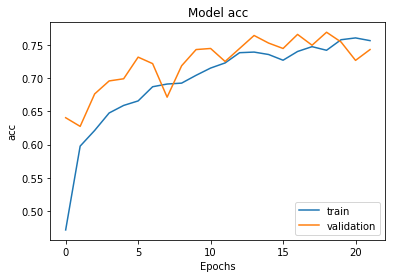

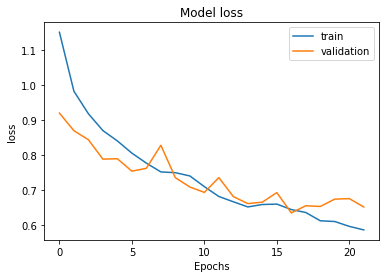

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 18s 254ms/step - loss: 1.2211 - acc: 0.4372 - val_loss: 0.9417 - val_acc: 0.5964
Epoch 2/50
69/69 [==============================] - 16s 229ms/step - loss: 0.9805 - acc: 0.5918 - val_loss: 0.8427 - val_acc: 0.6601
Epoch 3/50
69/69 [==============================] - 16s 232ms/step - loss: 0.9095 - acc: 0.6238 - val_loss: 0.7825 - val_acc: 0.6863
Epoch 4/50
69/69 [==============================] - 16s 228ms/step - loss: 0.8733 - acc: 0.6512 - val_loss: 0.7530 - val_acc: 0.7026
Epoch 5/50
69/69 [==============================] - 16s 229ms/step - loss: 0.8359 - acc: 0.6734 - val_loss: 0.7513 - val_acc: 0.6912
Epoch 6/50
69/69 [==============================] - 16s 232ms/step - loss: 0.8089 - acc: 0.6770 - val_loss: 0.7107 - val_acc: 0.7304
Epoch 7/50
69/69 [==============================] - 16s 233ms/step - loss: 0.7

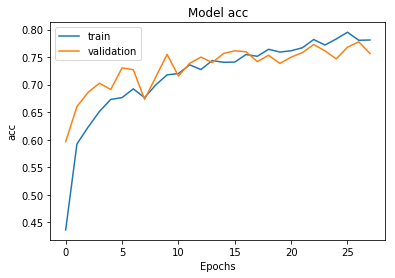

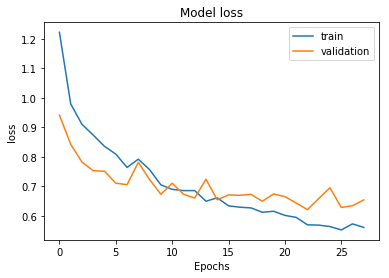

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 17s 480ms/step - loss: 1.2348 - acc: 0.4252 - val_loss: 1.0347 - val_acc: 0.5376
Epoch 2/50
35/35 [==============================] - 15s 428ms/step - loss: 1.0301 - acc: 0.5520 - val_loss: 0.9561 - val_acc: 0.5784
Epoch 3/50
35/35 [==============================] - 15s 435ms/step - loss: 0.9716 - acc: 0.5775 - val_loss: 0.8614 - val_acc: 0.6536
Epoch 4/50
35/35 [==============================] - 15s 430ms/step - loss: 0.9085 - acc: 0.6190 - val_loss: 0.8111 - val_acc: 0.6781
Epoch 5/50
35/35 [==============================] - 15s 434ms/step - loss: 0.8888 - acc: 0.6440 - val_loss: 0.8036 - val_acc: 0.6863
Epoch 6/50
35/35 [==============================] - 15s 435ms/step - loss: 0.8448 - acc: 0.6664 - val_loss: 0.7592 - val_acc: 0.6830
Epoch 7/50
35/35 [==============================] - 15s 437ms/step - loss: 0.8

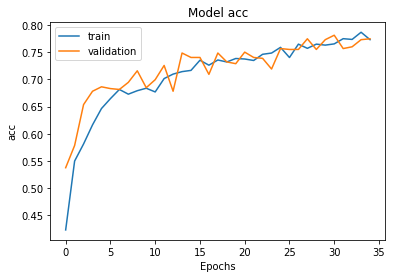

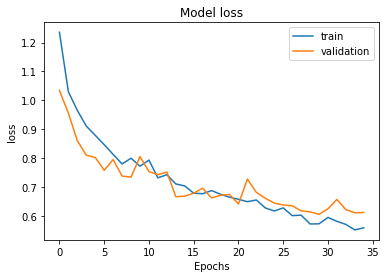

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 53s 386ms/step - loss: 1.1514 - acc: 0.5056 - val_loss: 0.9301 - val_acc: 0.6307
Epoch 2/50
138/138 [==============================] - 47s 344ms/step - loss: 0.9535 - acc: 0.6055 - val_loss: 0.8764 - val_acc: 0.6569
Epoch 3/50
138/138 [==============================] - 47s 343ms/step - loss: 0.9310 - acc: 0.6081 - val_loss: 0.8488 - val_acc: 0.6814
Epoch 4/50
138/138 [==============================] - 41s 296ms/step - loss: 0.8930 - acc: 0.6293 - val_loss: 0.8133 - val_acc: 0.6732
Epoch 5/50
138/138 [==============================] - 40s 293ms/step - loss: 0.8761 - acc: 0.6438 - val_loss: 0.8673 - val_acc: 0.6503
Epoch 6/50
138/138 [==============================] - 40s 291ms/step - loss: 0.8479 - acc: 0.6579 - val_loss: 0.7813 - val_acc: 0.6895
Epoch 7/50
138/138 [==============================] - 40s 292ms/st

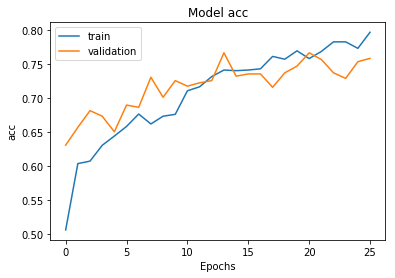

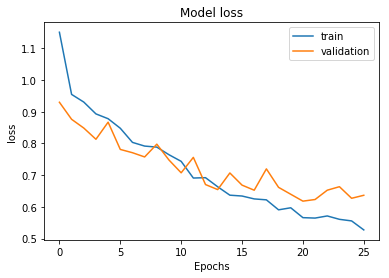

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 39s 564ms/step - loss: 1.1972 - acc: 0.4874 - val_loss: 0.9276 - val_acc: 0.6454
Epoch 2/50
69/69 [==============================] - 36s 521ms/step - loss: 0.9499 - acc: 0.6100 - val_loss: 0.8643 - val_acc: 0.6307
Epoch 3/50
69/69 [==============================] - 37s 532ms/step - loss: 0.9017 - acc: 0.6267 - val_loss: 0.8019 - val_acc: 0.6846
Epoch 4/50
69/69 [==============================] - 37s 530ms/step - loss: 0.8552 - acc: 0.6534 - val_loss: 0.8051 - val_acc: 0.6650
Epoch 5/50
69/69 [==============================] - 36s 524ms/step - loss: 0.8234 - acc: 0.6680 - val_loss: 0.7170 - val_acc: 0.7157
Epoch 6/50
69/69 [==============================] - 46s 667ms/step - loss: 0.7979 - acc: 0.6673 - val_loss: 0.7677 - val_acc: 0.7124
Epoch 7/50
69/69 [==============================] - 41s 592ms/step - loss: 0.7

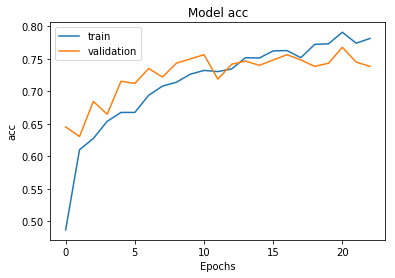

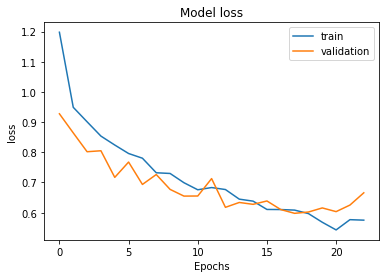

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 38s 1s/step - loss: 1.2325 - acc: 0.4444 - val_loss: 0.9807 - val_acc: 0.6095
Epoch 2/50
35/35 [==============================] - 35s 992ms/step - loss: 0.9657 - acc: 0.5882 - val_loss: 0.8698 - val_acc: 0.6242
Epoch 3/50
35/35 [==============================] - 36s 1s/step - loss: 0.9029 - acc: 0.6297 - val_loss: 0.8168 - val_acc: 0.6683
Epoch 4/50
35/35 [==============================] - 36s 1s/step - loss: 0.8484 - acc: 0.6503 - val_loss: 0.8195 - val_acc: 0.6454
Epoch 5/50
35/35 [==============================] - 35s 1s/step - loss: 0.8271 - acc: 0.6583 - val_loss: 0.7401 - val_acc: 0.7206
Epoch 6/50
35/35 [==============================] - 35s 1s/step - loss: 0.7770 - acc: 0.6815 - val_loss: 0.7877 - val_acc: 0.6928
Epoch 7/50
35/35 [==============================] - 35s 1s/step - loss: 0.7964 - acc: 0.6753 

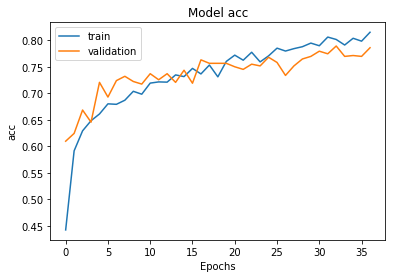

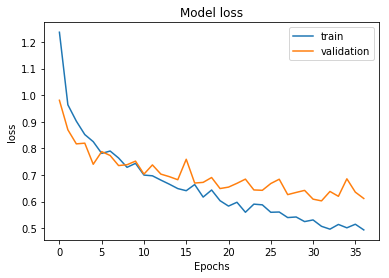

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 22s 157ms/step - loss: 1.2019 - acc: 0.4535 - val_loss: 0.9217 - val_acc: 0.6029
Epoch 2/50
138/138 [==============================] - 18s 127ms/step - loss: 0.9682 - acc: 0.5708 - val_loss: 0.9140 - val_acc: 0.6258
Epoch 3/50
138/138 [==============================] - 18s 128ms/step - loss: 0.9294 - acc: 0.6003 - val_loss: 0.8625 - val_acc: 0.6569
Epoch 4/50
138/138 [==============================] - 18s 128ms/step - loss: 0.8720 - acc: 0.6344 - val_loss: 0.7986 - val_acc: 0.6585
Epoch 5/50
138/138 [==============================] - 18s 129ms/step - loss: 0.8400 - acc: 0.6471 - val_loss: 0.7853 - val_acc: 0.7075
Epoch 6/50
138/138 [==============================] - 17s 125ms/step - loss: 0.8224 - acc: 0.6639 - val_loss: 0.7990 - val_acc: 0.6699
Epoch 7/50
138/138 [==============================] - 17s 125ms/st

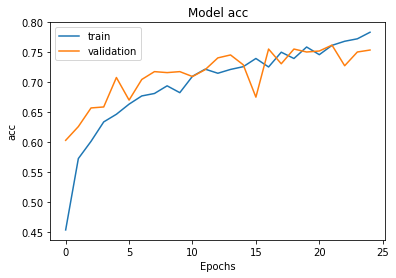

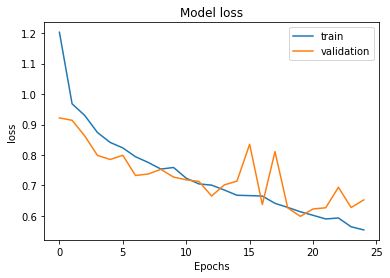

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 19s 270ms/step - loss: 1.2484 - acc: 0.4032 - val_loss: 1.0489 - val_acc: 0.5670
Epoch 2/50
69/69 [==============================] - 16s 230ms/step - loss: 0.9774 - acc: 0.5864 - val_loss: 0.8699 - val_acc: 0.6405
Epoch 3/50
69/69 [==============================] - 16s 235ms/step - loss: 0.9333 - acc: 0.5968 - val_loss: 0.8524 - val_acc: 0.6585
Epoch 4/50
69/69 [==============================] - 16s 233ms/step - loss: 0.8775 - acc: 0.6392 - val_loss: 0.8139 - val_acc: 0.6487
Epoch 5/50
69/69 [==============================] - 16s 234ms/step - loss: 0.8640 - acc: 0.6356 - val_loss: 0.8031 - val_acc: 0.6732
Epoch 6/50
69/69 [==============================] - 16s 233ms/step - loss: 0.8508 - acc: 0.6544 - val_loss: 0.8147 - val_acc: 0.6503
Epoch 7/50
69/69 [==============================] - 16s 237ms/step - loss: 0.8

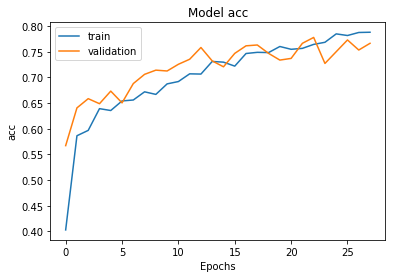

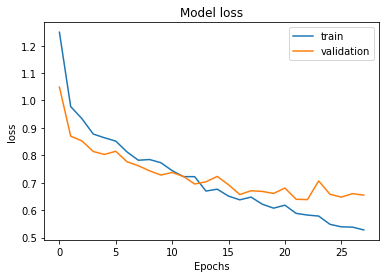

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 17s 488ms/step - loss: 1.2645 - acc: 0.4033 - val_loss: 1.0951 - val_acc: 0.5327
Epoch 2/50
35/35 [==============================] - 15s 440ms/step - loss: 1.0350 - acc: 0.5462 - val_loss: 0.9218 - val_acc: 0.5931
Epoch 3/50
35/35 [==============================] - 16s 445ms/step - loss: 0.9704 - acc: 0.5811 - val_loss: 0.9392 - val_acc: 0.6176
Epoch 4/50
35/35 [==============================] - 16s 448ms/step - loss: 0.9267 - acc: 0.6083 - val_loss: 0.8639 - val_acc: 0.6225
Epoch 5/50
35/35 [==============================] - 15s 439ms/step - loss: 0.9115 - acc: 0.6003 - val_loss: 0.8384 - val_acc: 0.6454
Epoch 6/50
35/35 [==============================] - 16s 445ms/step - loss: 0.8678 - acc: 0.6346 - val_loss: 0.8232 - val_acc: 0.6520
Epoch 7/50
35/35 [==============================] - 16s 446ms/step - loss: 0.8

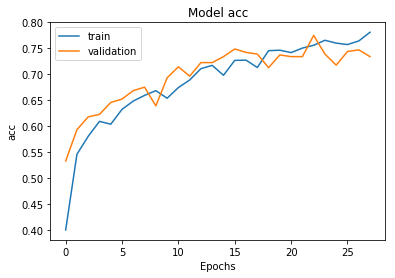

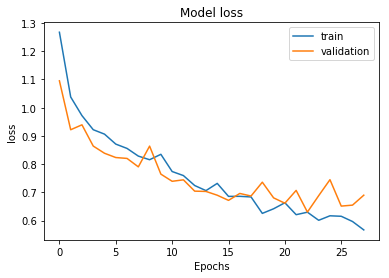

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 44s 317ms/step - loss: 1.1076 - acc: 0.5062 - val_loss: 0.9229 - val_acc: 0.6405
Epoch 2/50
138/138 [==============================] - 41s 296ms/step - loss: 0.9666 - acc: 0.6145 - val_loss: 0.8458 - val_acc: 0.6307
Epoch 3/50
138/138 [==============================] - 41s 297ms/step - loss: 0.8872 - acc: 0.6265 - val_loss: 0.8285 - val_acc: 0.6373
Epoch 4/50
138/138 [==============================] - 41s 298ms/step - loss: 0.8626 - acc: 0.6403 - val_loss: 0.7598 - val_acc: 0.6732
Epoch 5/50
138/138 [==============================] - 41s 296ms/step - loss: 0.8127 - acc: 0.6737 - val_loss: 0.7545 - val_acc: 0.7157
Epoch 6/50
138/138 [==============================] - 41s 298ms/step - loss: 0.7997 - acc: 0.6641 - val_loss: 0.7220 - val_acc: 0.7239
Epoch 7/50
138/138 [==============================] - 41s 297ms/st

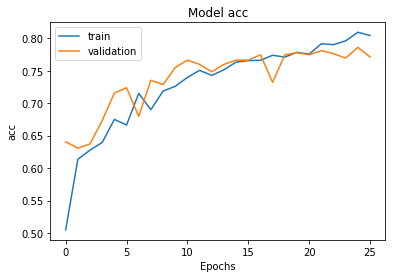

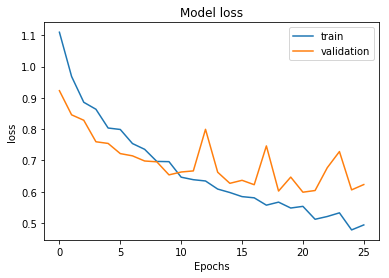

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 41s 591ms/step - loss: 1.1006 - acc: 0.5160 - val_loss: 0.9398 - val_acc: 0.6013
Epoch 2/50
69/69 [==============================] - 38s 552ms/step - loss: 0.9547 - acc: 0.6045 - val_loss: 0.8377 - val_acc: 0.6699
Epoch 3/50
69/69 [==============================] - 38s 555ms/step - loss: 0.8931 - acc: 0.6294 - val_loss: 0.9187 - val_acc: 0.5915
Epoch 4/50
69/69 [==============================] - 38s 552ms/step - loss: 0.8679 - acc: 0.6476 - val_loss: 0.7713 - val_acc: 0.6944
Epoch 5/50
69/69 [==============================] - 38s 553ms/step - loss: 0.8033 - acc: 0.6759 - val_loss: 0.7554 - val_acc: 0.7010
Epoch 6/50
69/69 [==============================] - 38s 553ms/step - loss: 0.7986 - acc: 0.6867 - val_loss: 0.7183 - val_acc: 0.7239
Epoch 7/50
69/69 [==============================] - 38s 551ms/step - loss: 0.7

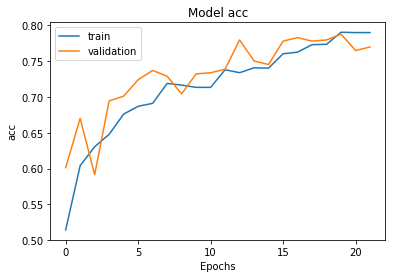

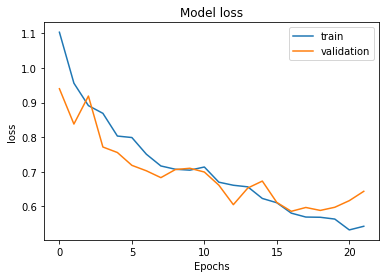

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 40s 1s/step - loss: 1.2223 - acc: 0.4337 - val_loss: 1.0137 - val_acc: 0.5588
Epoch 2/50
35/35 [==============================] - 37s 1s/step - loss: 1.0113 - acc: 0.5686 - val_loss: 0.9003 - val_acc: 0.6781
Epoch 3/50
35/35 [==============================] - 37s 1s/step - loss: 0.9375 - acc: 0.6253 - val_loss: 0.9684 - val_acc: 0.5784
Epoch 4/50
35/35 [==============================] - 37s 1s/step - loss: 0.8705 - acc: 0.6467 - val_loss: 0.8240 - val_acc: 0.6748
Epoch 5/50
35/35 [==============================] - 37s 1s/step - loss: 0.8733 - acc: 0.6436 - val_loss: 0.7878 - val_acc: 0.6846
Epoch 6/50
35/35 [==============================] - 37s 1s/step - loss: 0.8070 - acc: 0.6735 - val_loss: 0.7587 - val_acc: 0.6895
Epoch 7/50
35/35 [==============================] - 37s 1s/step - loss: 0.7836 - acc: 0.6896 - v

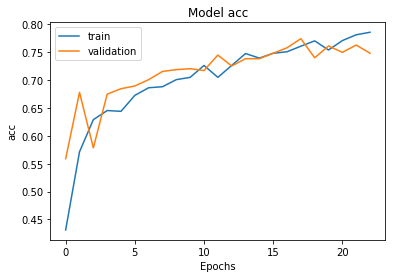

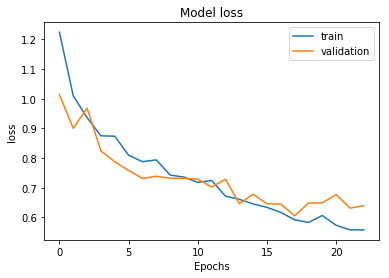

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 21s 149ms/step - loss: 1.1720 - acc: 0.4541 - val_loss: 0.9424 - val_acc: 0.5752
Epoch 2/50
138/138 [==============================] - 18s 129ms/step - loss: 1.0083 - acc: 0.5446 - val_loss: 0.8703 - val_acc: 0.6275
Epoch 3/50
138/138 [==============================] - 18s 128ms/step - loss: 0.9326 - acc: 0.5891 - val_loss: 0.8501 - val_acc: 0.6209
Epoch 4/50
138/138 [==============================] - 18s 129ms/step - loss: 0.8606 - acc: 0.6276 - val_loss: 0.9180 - val_acc: 0.6258
Epoch 5/50
138/138 [==============================] - 18s 127ms/step - loss: 0.8549 - acc: 0.6329 - val_loss: 0.8464 - val_acc: 0.6618
Epoch 6/50
138/138 [==============================] - 18s 129ms/step - loss: 0.8249 - acc: 0.6549 - val_loss: 0.7767 - val_acc: 0.6699
Epoch 7/50
138/138 [==============================] - 17s 125ms/st

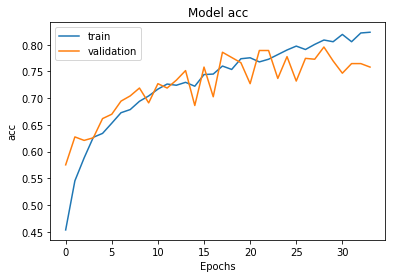

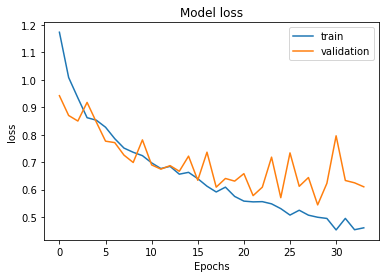

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 19s 272ms/step - loss: 1.3107 - acc: 0.3518 - val_loss: 1.0693 - val_acc: 0.4984
Epoch 2/50
69/69 [==============================] - 16s 239ms/step - loss: 1.0593 - acc: 0.5298 - val_loss: 1.0001 - val_acc: 0.5458
Epoch 3/50
69/69 [==============================] - 16s 238ms/step - loss: 0.9540 - acc: 0.5988 - val_loss: 0.9397 - val_acc: 0.5768
Epoch 4/50
69/69 [==============================] - 16s 239ms/step - loss: 0.9428 - acc: 0.6011 - val_loss: 0.9107 - val_acc: 0.5931
Epoch 5/50
69/69 [==============================] - 16s 236ms/step - loss: 0.8817 - acc: 0.6109 - val_loss: 0.8660 - val_acc: 0.6275
Epoch 6/50
69/69 [==============================] - 16s 239ms/step - loss: 0.8683 - acc: 0.6301 - val_loss: 0.8953 - val_acc: 0.6275
Epoch 7/50
69/69 [==============================] - 16s 237ms/step - loss: 0.8

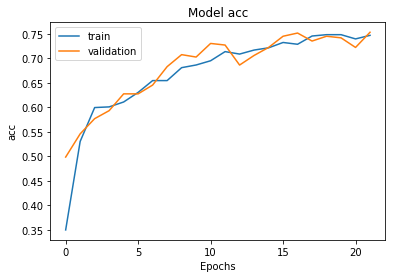

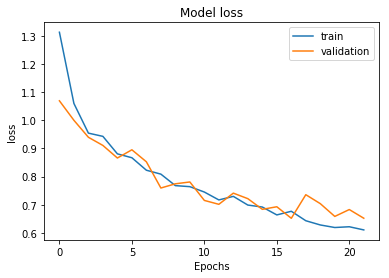

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 18s 503ms/step - loss: 1.2850 - acc: 0.3716 - val_loss: 1.1816 - val_acc: 0.4379
Epoch 2/50
35/35 [==============================] - 16s 445ms/step - loss: 1.1421 - acc: 0.4761 - val_loss: 1.0593 - val_acc: 0.5294
Epoch 3/50
35/35 [==============================] - 16s 457ms/step - loss: 1.0250 - acc: 0.5404 - val_loss: 0.9554 - val_acc: 0.5817
Epoch 4/50
35/35 [==============================] - 16s 449ms/step - loss: 0.9542 - acc: 0.5762 - val_loss: 0.8803 - val_acc: 0.5948
Epoch 5/50
35/35 [==============================] - 16s 452ms/step - loss: 0.9073 - acc: 0.6034 - val_loss: 0.8550 - val_acc: 0.6291
Epoch 6/50
35/35 [==============================] - 16s 450ms/step - loss: 0.8872 - acc: 0.6168 - val_loss: 0.8396 - val_acc: 0.6144
Epoch 7/50
35/35 [==============================] - 16s 452ms/step - loss: 0.8

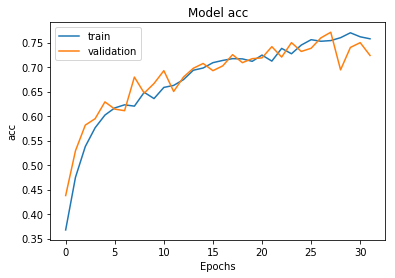

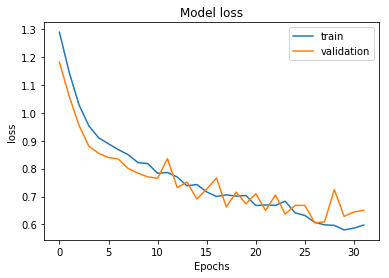

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 45s 323ms/step - loss: 1.1786 - acc: 0.4514 - val_loss: 0.9793 - val_acc: 0.5801
Epoch 2/50
138/138 [==============================] - 41s 298ms/step - loss: 0.9518 - acc: 0.5895 - val_loss: 0.8828 - val_acc: 0.6111
Epoch 3/50
138/138 [==============================] - 41s 299ms/step - loss: 0.8909 - acc: 0.6257 - val_loss: 0.7734 - val_acc: 0.7190
Epoch 4/50
138/138 [==============================] - 41s 300ms/step - loss: 0.8411 - acc: 0.6520 - val_loss: 0.7283 - val_acc: 0.7190
Epoch 5/50
138/138 [==============================] - 41s 299ms/step - loss: 0.8115 - acc: 0.6693 - val_loss: 0.8313 - val_acc: 0.6781
Epoch 6/50
138/138 [==============================] - 42s 302ms/step - loss: 0.7589 - acc: 0.6932 - val_loss: 0.7426 - val_acc: 0.7206
Epoch 7/50
138/138 [==============================] - 41s 296ms/st

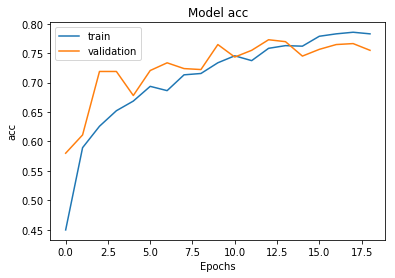

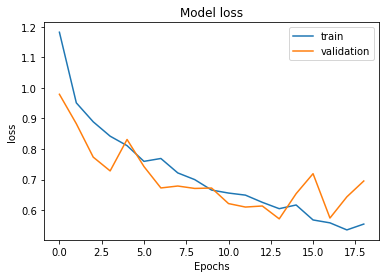

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 43s 617ms/step - loss: 1.2398 - acc: 0.4057 - val_loss: 1.0952 - val_acc: 0.5114
Epoch 2/50
69/69 [==============================] - 39s 569ms/step - loss: 1.0056 - acc: 0.5705 - val_loss: 0.9357 - val_acc: 0.6127
Epoch 3/50
69/69 [==============================] - 39s 565ms/step - loss: 0.9498 - acc: 0.6086 - val_loss: 1.0181 - val_acc: 0.5964
Epoch 4/50
69/69 [==============================] - 39s 572ms/step - loss: 0.8718 - acc: 0.6562 - val_loss: 0.7650 - val_acc: 0.6961
Epoch 5/50
69/69 [==============================] - 39s 567ms/step - loss: 0.8510 - acc: 0.6385 - val_loss: 0.7766 - val_acc: 0.6961
Epoch 6/50
69/69 [==============================] - 39s 569ms/step - loss: 0.7995 - acc: 0.6806 - val_loss: 0.7410 - val_acc: 0.7222
Epoch 7/50
69/69 [==============================] - 39s 571ms/step - loss: 0.7

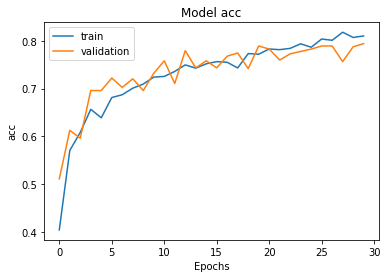

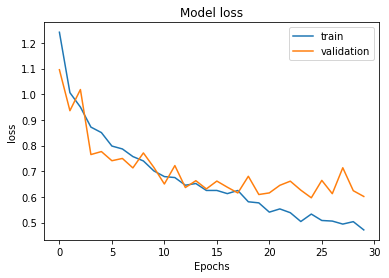

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 42s 1s/step - loss: 1.2466 - acc: 0.3885 - val_loss: 1.0455 - val_acc: 0.5637
Epoch 2/50
35/35 [==============================] - 38s 1s/step - loss: 0.9781 - acc: 0.5757 - val_loss: 0.8335 - val_acc: 0.6634
Epoch 3/50
35/35 [==============================] - 38s 1s/step - loss: 0.9249 - acc: 0.6097 - val_loss: 0.8261 - val_acc: 0.6699
Epoch 4/50
35/35 [==============================] - 38s 1s/step - loss: 0.8923 - acc: 0.6356 - val_loss: 0.7823 - val_acc: 0.6846
Epoch 5/50
35/35 [==============================] - 38s 1s/step - loss: 0.8457 - acc: 0.6490 - val_loss: 0.8051 - val_acc: 0.6765
Epoch 6/50
35/35 [==============================] - 38s 1s/step - loss: 0.8346 - acc: 0.6503 - val_loss: 0.7913 - val_acc: 0.6732
Epoch 7/50
35/35 [==============================] - 38s 1s/step - loss: 0.8034 - acc: 0.6641 - v

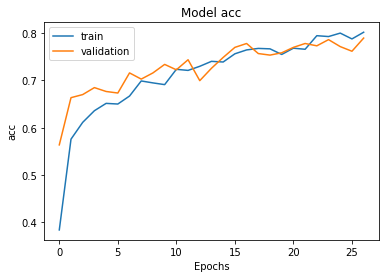

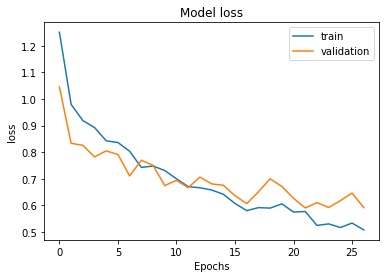

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 28s 203ms/step - loss: 1.3027 - acc: 0.4698 - val_loss: 0.9708 - val_acc: 0.5817
Epoch 2/50
138/138 [==============================] - 24s 173ms/step - loss: 0.9985 - acc: 0.5862 - val_loss: 0.8143 - val_acc: 0.6993
Epoch 3/50
138/138 [==============================] - 24s 175ms/step - loss: 0.9316 - acc: 0.6145 - val_loss: 0.8565 - val_acc: 0.6797
Epoch 4/50
138/138 [==============================] - 24s 176ms/step - loss: 0.8838 - acc: 0.6366 - val_loss: 0.8171 - val_acc: 0.6797
Epoch 5/50
138/138 [==============================] - 24s 177ms/step - loss: 0.8810 - acc: 0.6417 - val_loss: 0.7602 - val_acc: 0.6977
Epoch 6/50
138/138 [==============================] - 24s 175ms/step - loss: 0.8445 - acc: 0.6573 - val_loss: 0.8140 - val_acc: 0.6879
Epoch 7/50
138/138 [==============================] - 24s 175ms/st

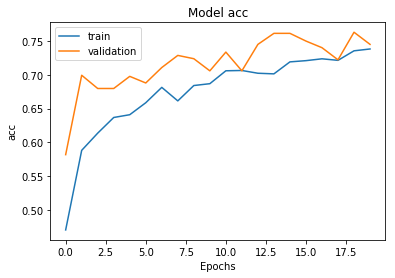

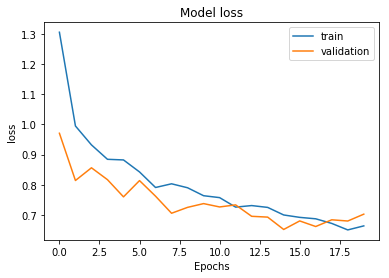

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 23s 332ms/step - loss: 1.2879 - acc: 0.4442 - val_loss: 1.0618 - val_acc: 0.5801
Epoch 2/50
69/69 [==============================] - 19s 281ms/step - loss: 1.0093 - acc: 0.5672 - val_loss: 0.8716 - val_acc: 0.6536
Epoch 3/50
69/69 [==============================] - 20s 285ms/step - loss: 0.9748 - acc: 0.6043 - val_loss: 0.8207 - val_acc: 0.6699
Epoch 4/50
69/69 [==============================] - 20s 285ms/step - loss: 0.9196 - acc: 0.6290 - val_loss: 0.8240 - val_acc: 0.6732
Epoch 5/50
69/69 [==============================] - 20s 283ms/step - loss: 0.8726 - acc: 0.6548 - val_loss: 0.7818 - val_acc: 0.6895
Epoch 6/50
69/69 [==============================] - 20s 285ms/step - loss: 0.8724 - acc: 0.6408 - val_loss: 0.7642 - val_acc: 0.6830
Epoch 7/50
69/69 [==============================] - 19s 281ms/step - loss: 0.8

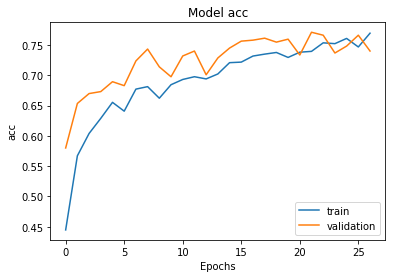

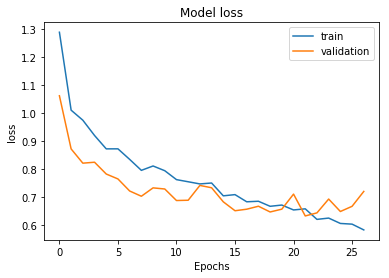

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 19s 555ms/step - loss: 1.4950 - acc: 0.4140 - val_loss: 0.9907 - val_acc: 0.6242
Epoch 2/50
35/35 [==============================] - 17s 486ms/step - loss: 1.0279 - acc: 0.5645 - val_loss: 0.8948 - val_acc: 0.6487
Epoch 3/50
35/35 [==============================] - 17s 497ms/step - loss: 0.9621 - acc: 0.5989 - val_loss: 0.8750 - val_acc: 0.6797
Epoch 4/50
35/35 [==============================] - 17s 495ms/step - loss: 0.9216 - acc: 0.6208 - val_loss: 0.8053 - val_acc: 0.6993
Epoch 5/50
35/35 [==============================] - 17s 499ms/step - loss: 0.8794 - acc: 0.6463 - val_loss: 0.7761 - val_acc: 0.7042
Epoch 6/50
35/35 [==============================] - 17s 495ms/step - loss: 0.8521 - acc: 0.6521 - val_loss: 0.8072 - val_acc: 0.6830
Epoch 7/50
35/35 [==============================] - 17s 497ms/step - loss: 0.8

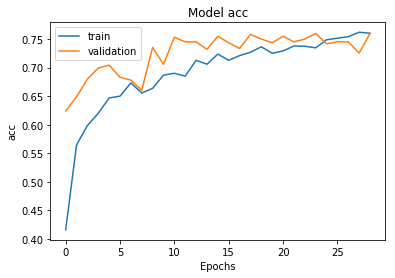

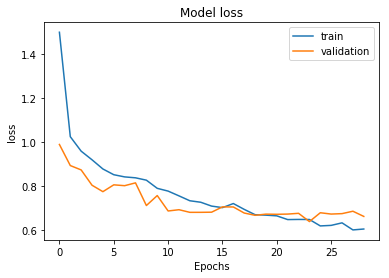

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 70s 510ms/step - loss: 3.0976 - acc: 0.4526 - val_loss: 0.9477 - val_acc: 0.5801
Epoch 2/50
138/138 [==============================] - 66s 477ms/step - loss: 0.9992 - acc: 0.6063 - val_loss: 0.8895 - val_acc: 0.6863
Epoch 3/50
138/138 [==============================] - 66s 475ms/step - loss: 0.9415 - acc: 0.6401 - val_loss: 0.8482 - val_acc: 0.6879
Epoch 4/50
138/138 [==============================] - 66s 476ms/step - loss: 0.9075 - acc: 0.6405 - val_loss: 0.8333 - val_acc: 0.6830
Epoch 5/50
138/138 [==============================] - 66s 475ms/step - loss: 0.8791 - acc: 0.6448 - val_loss: 0.8169 - val_acc: 0.6863
Epoch 6/50
138/138 [==============================] - 66s 477ms/step - loss: 0.8525 - acc: 0.6716 - val_loss: 0.8651 - val_acc: 0.6471
Epoch 7/50
138/138 [==============================] - 66s 475ms/st

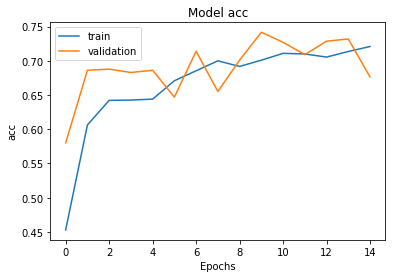

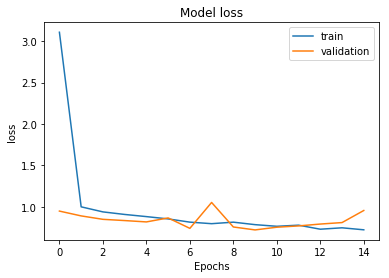

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 55s 800ms/step - loss: 1.7791 - acc: 0.4619 - val_loss: 0.9653 - val_acc: 0.6601
Epoch 2/50
69/69 [==============================] - 51s 732ms/step - loss: 1.0321 - acc: 0.5531 - val_loss: 0.9125 - val_acc: 0.6389
Epoch 3/50
69/69 [==============================] - 51s 739ms/step - loss: 0.9770 - acc: 0.5939 - val_loss: 0.8597 - val_acc: 0.6797
Epoch 4/50
69/69 [==============================] - 51s 742ms/step - loss: 0.9572 - acc: 0.6154 - val_loss: 0.8170 - val_acc: 0.6846
Epoch 5/50
69/69 [==============================] - 51s 741ms/step - loss: 0.9108 - acc: 0.6261 - val_loss: 0.8052 - val_acc: 0.6765
Epoch 6/50
69/69 [==============================] - 51s 735ms/step - loss: 0.8956 - acc: 0.6439 - val_loss: 0.7802 - val_acc: 0.7059
Epoch 7/50
69/69 [==============================] - 51s 742ms/step - loss: 0.8

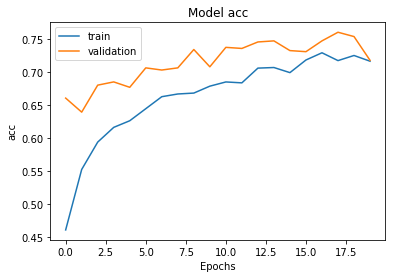

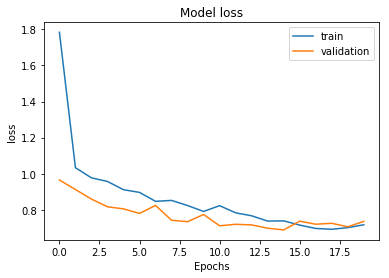

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 48s 1s/step - loss: 3.9044 - acc: 0.3787 - val_loss: 1.1393 - val_acc: 0.5441
Epoch 2/50
35/35 [==============================] - 44s 1s/step - loss: 1.1535 - acc: 0.5091 - val_loss: 0.9787 - val_acc: 0.5850
Epoch 3/50
35/35 [==============================] - 45s 1s/step - loss: 1.0213 - acc: 0.5864 - val_loss: 0.8685 - val_acc: 0.6748
Epoch 4/50
35/35 [==============================] - 44s 1s/step - loss: 0.9645 - acc: 0.5985 - val_loss: 0.8237 - val_acc: 0.6797
Epoch 5/50
35/35 [==============================] - 44s 1s/step - loss: 0.9099 - acc: 0.6409 - val_loss: 0.9263 - val_acc: 0.6291
Epoch 6/50
35/35 [==============================] - 44s 1s/step - loss: 0.8956 - acc: 0.6297 - val_loss: 0.7780 - val_acc: 0.6977
Epoch 7/50
35/35 [==============================] - 44s 1s/step - loss: 0.8726 - acc: 0.6476 - v

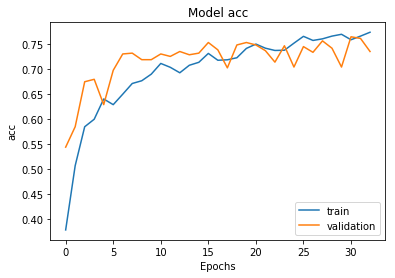

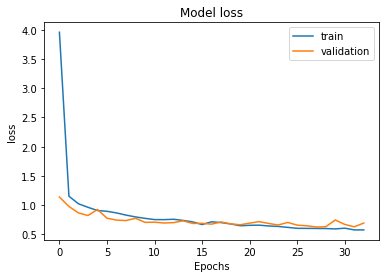

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 26s 188ms/step - loss: 1.1326 - acc: 0.4812 - val_loss: 0.9193 - val_acc: 0.6258
Epoch 2/50
138/138 [==============================] - 22s 159ms/step - loss: 0.9507 - acc: 0.5980 - val_loss: 0.8067 - val_acc: 0.6781
Epoch 3/50
138/138 [==============================] - 23s 169ms/step - loss: 0.8942 - acc: 0.6329 - val_loss: 0.8471 - val_acc: 0.6618
Epoch 4/50
138/138 [==============================] - 22s 160ms/step - loss: 0.8618 - acc: 0.6342 - val_loss: 0.7970 - val_acc: 0.7092
Epoch 5/50
138/138 [==============================] - 22s 161ms/step - loss: 0.8389 - acc: 0.6682 - val_loss: 0.7828 - val_acc: 0.7075
Epoch 6/50
138/138 [==============================] - 22s 159ms/step - loss: 0.7992 - acc: 0.6773 - val_loss: 0.7076 - val_acc: 0.7206
Epoch 7/50
138/138 [==============================] - 22s 160ms/st

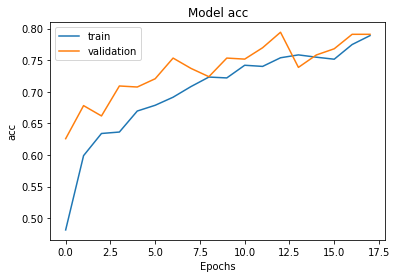

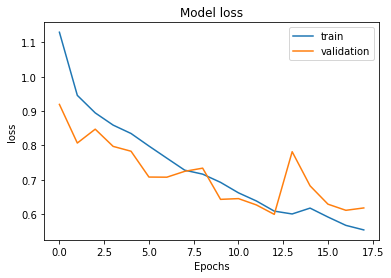

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 28s 405ms/step - loss: 1.1407 - acc: 0.4852 - val_loss: 0.9531 - val_acc: 0.6487
Epoch 2/50
69/69 [==============================] - 25s 360ms/step - loss: 0.9714 - acc: 0.6032 - val_loss: 0.8845 - val_acc: 0.6487
Epoch 3/50
69/69 [==============================] - 20s 294ms/step - loss: 0.9222 - acc: 0.6159 - val_loss: 0.8486 - val_acc: 0.6389
Epoch 4/50
69/69 [==============================] - 20s 285ms/step - loss: 0.8942 - acc: 0.6374 - val_loss: 0.8183 - val_acc: 0.6912
Epoch 5/50
69/69 [==============================] - 20s 291ms/step - loss: 0.8642 - acc: 0.6446 - val_loss: 0.8303 - val_acc: 0.6879
Epoch 6/50
69/69 [==============================] - 22s 315ms/step - loss: 0.8270 - acc: 0.6652 - val_loss: 0.7866 - val_acc: 0.6814
Epoch 7/50
69/69 [==============================] - 20s 294ms/step - loss: 0.7

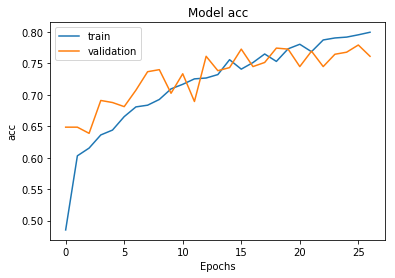

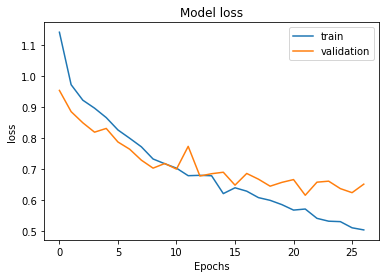

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 21s 612ms/step - loss: 1.2251 - acc: 0.4386 - val_loss: 0.9832 - val_acc: 0.5980
Epoch 2/50
35/35 [==============================] - 19s 532ms/step - loss: 0.9849 - acc: 0.5726 - val_loss: 0.8526 - val_acc: 0.6765
Epoch 3/50
35/35 [==============================] - 20s 565ms/step - loss: 0.9095 - acc: 0.6105 - val_loss: 0.8436 - val_acc: 0.6356
Epoch 4/50
35/35 [==============================] - 19s 547ms/step - loss: 0.8803 - acc: 0.6338 - val_loss: 0.8135 - val_acc: 0.6846
Epoch 5/50
35/35 [==============================] - 19s 553ms/step - loss: 0.8656 - acc: 0.6458 - val_loss: 0.7693 - val_acc: 0.7190
Epoch 6/50
35/35 [==============================] - 19s 550ms/step - loss: 0.8140 - acc: 0.6699 - val_loss: 0.7959 - val_acc: 0.6993
Epoch 7/50
35/35 [==============================] - 19s 547ms/step - loss: 0.8

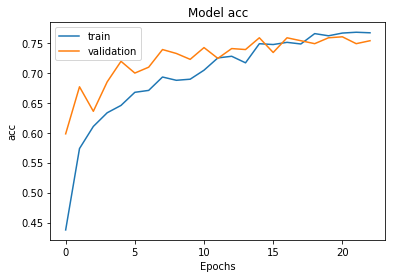

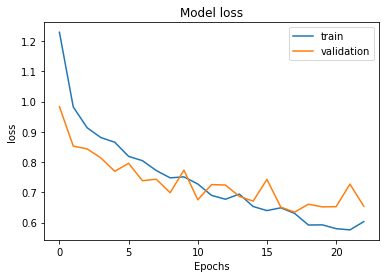

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 62s 451ms/step - loss: 1.2514 - acc: 0.4399 - val_loss: 1.0141 - val_acc: 0.5621
Epoch 2/50
138/138 [==============================] - 70s 506ms/step - loss: 1.0246 - acc: 0.5891 - val_loss: 0.8928 - val_acc: 0.6373
Epoch 3/50
138/138 [==============================] - 69s 502ms/step - loss: 0.9371 - acc: 0.6293 - val_loss: 0.8691 - val_acc: 0.6471
Epoch 4/50
138/138 [==============================] - 69s 497ms/step - loss: 0.8993 - acc: 0.6345 - val_loss: 0.8451 - val_acc: 0.6585
Epoch 5/50
138/138 [==============================] - 68s 493ms/step - loss: 0.8549 - acc: 0.6547 - val_loss: 0.8060 - val_acc: 0.6765
Epoch 6/50
138/138 [==============================] - 68s 490ms/step - loss: 0.8070 - acc: 0.6815 - val_loss: 0.7944 - val_acc: 0.6650
Epoch 7/50
138/138 [==============================] - 67s 489ms/st

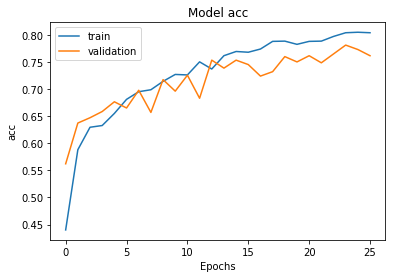

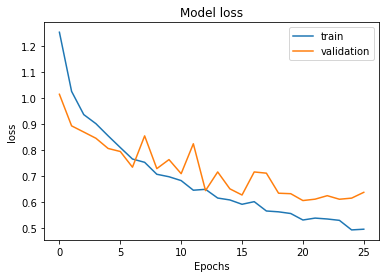

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 66s 961ms/step - loss: 1.1590 - acc: 0.4967 - val_loss: 0.9488 - val_acc: 0.6324
Epoch 2/50
69/69 [==============================] - 54s 785ms/step - loss: 0.9650 - acc: 0.6007 - val_loss: 0.8296 - val_acc: 0.6928
Epoch 3/50
69/69 [==============================] - 54s 785ms/step - loss: 0.9371 - acc: 0.6226 - val_loss: 0.8391 - val_acc: 0.6291
Epoch 4/50
69/69 [==============================] - 54s 781ms/step - loss: 0.9147 - acc: 0.6229 - val_loss: 0.8482 - val_acc: 0.6863
Epoch 5/50
69/69 [==============================] - 55s 791ms/step - loss: 0.8482 - acc: 0.6496 - val_loss: 0.7899 - val_acc: 0.7010
Epoch 6/50
69/69 [==============================] - 54s 781ms/step - loss: 0.8518 - acc: 0.6580 - val_loss: 0.7849 - val_acc: 0.6944
Epoch 7/50
69/69 [==============================] - 54s 784ms/step - loss: 0.7

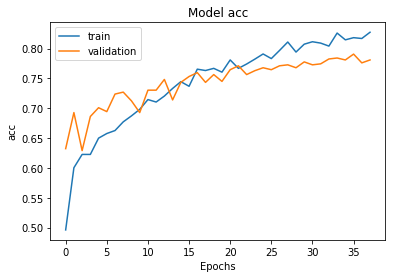

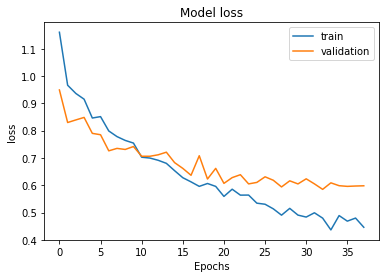

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 72s 2s/step - loss: 1.2102 - acc: 0.5096 - val_loss: 0.9202 - val_acc: 0.6373
Epoch 2/50
35/35 [==============================] - 69s 2s/step - loss: 0.9483 - acc: 0.6231 - val_loss: 0.8295 - val_acc: 0.6765
Epoch 3/50
35/35 [==============================] - 60s 2s/step - loss: 0.8678 - acc: 0.6512 - val_loss: 0.7660 - val_acc: 0.6912
Epoch 4/50
35/35 [==============================] - 61s 2s/step - loss: 0.8324 - acc: 0.6615 - val_loss: 0.7573 - val_acc: 0.6944
Epoch 5/50
35/35 [==============================] - 58s 2s/step - loss: 0.8184 - acc: 0.6619 - val_loss: 0.7252 - val_acc: 0.7304
Epoch 6/50
35/35 [==============================] - 56s 2s/step - loss: 0.8104 - acc: 0.6713 - val_loss: 0.7466 - val_acc: 0.7059
Epoch 7/50
35/35 [==============================] - 56s 2s/step - loss: 0.7674 - acc: 0.6990 - v

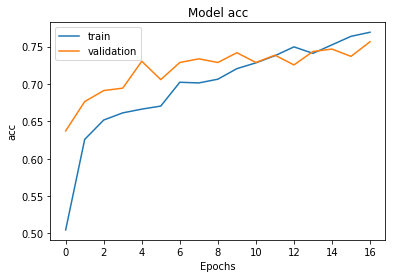

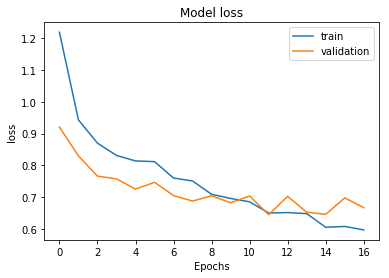

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 32s 232ms/step - loss: 1.1412 - acc: 0.4824 - val_loss: 0.9587 - val_acc: 0.5719
Epoch 2/50
138/138 [==============================] - 25s 182ms/step - loss: 0.9727 - acc: 0.5894 - val_loss: 0.8514 - val_acc: 0.6520
Epoch 3/50
138/138 [==============================] - 26s 191ms/step - loss: 0.9205 - acc: 0.6158 - val_loss: 0.8075 - val_acc: 0.6601
Epoch 4/50
138/138 [==============================] - 27s 194ms/step - loss: 0.8875 - acc: 0.6361 - val_loss: 0.8288 - val_acc: 0.6536
Epoch 5/50
138/138 [==============================] - 30s 220ms/step - loss: 0.8345 - acc: 0.6606 - val_loss: 0.7522 - val_acc: 0.7157
Epoch 6/50
138/138 [==============================] - 28s 206ms/step - loss: 0.7916 - acc: 0.6879 - val_loss: 0.7573 - val_acc: 0.7010
Epoch 7/50
138/138 [==============================] - 26s 185ms/st

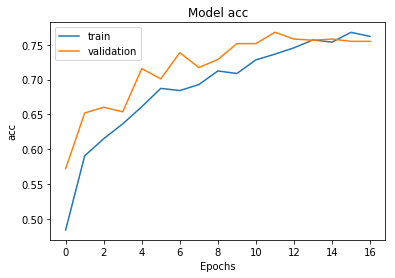

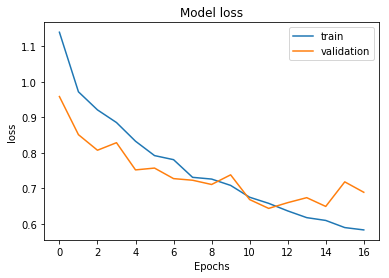

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 24s 351ms/step - loss: 1.1632 - acc: 0.4725 - val_loss: 1.0061 - val_acc: 0.5752
Epoch 2/50
69/69 [==============================] - 20s 296ms/step - loss: 0.9891 - acc: 0.5712 - val_loss: 0.9150 - val_acc: 0.6356
Epoch 3/50
69/69 [==============================] - 20s 295ms/step - loss: 0.8992 - acc: 0.6097 - val_loss: 0.8590 - val_acc: 0.6471
Epoch 4/50
69/69 [==============================] - 20s 296ms/step - loss: 0.8678 - acc: 0.6319 - val_loss: 0.8303 - val_acc: 0.6797
Epoch 5/50
69/69 [==============================] - 21s 298ms/step - loss: 0.8352 - acc: 0.6521 - val_loss: 0.7757 - val_acc: 0.6993
Epoch 6/50
69/69 [==============================] - 23s 329ms/step - loss: 0.8115 - acc: 0.6668 - val_loss: 0.7420 - val_acc: 0.7010
Epoch 7/50
69/69 [==============================] - 24s 344ms/step - loss: 0.7

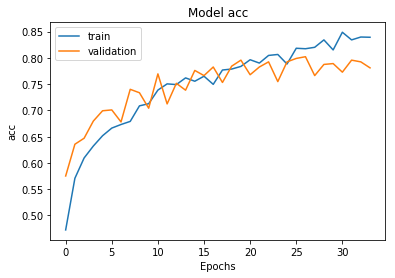

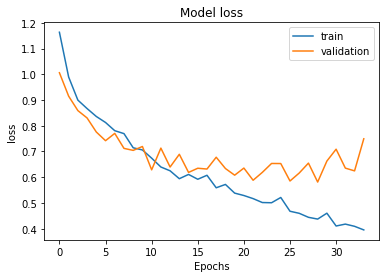

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 25s 720ms/step - loss: 1.2695 - acc: 0.4078 - val_loss: 1.0460 - val_acc: 0.5474
Epoch 2/50
35/35 [==============================] - 23s 652ms/step - loss: 1.0484 - acc: 0.5426 - val_loss: 0.8947 - val_acc: 0.6324
Epoch 3/50
35/35 [==============================] - 23s 643ms/step - loss: 0.9730 - acc: 0.5927 - val_loss: 0.8644 - val_acc: 0.6405
Epoch 4/50
35/35 [==============================] - 24s 673ms/step - loss: 0.8980 - acc: 0.6172 - val_loss: 0.9373 - val_acc: 0.6062
Epoch 5/50
35/35 [==============================] - 26s 734ms/step - loss: 0.8894 - acc: 0.6172 - val_loss: 0.8160 - val_acc: 0.6618
Epoch 6/50
35/35 [==============================] - 25s 721ms/step - loss: 0.8360 - acc: 0.6530 - val_loss: 0.7527 - val_acc: 0.6895
Epoch 7/50
35/35 [==============================] - 24s 685ms/step - loss: 0.8

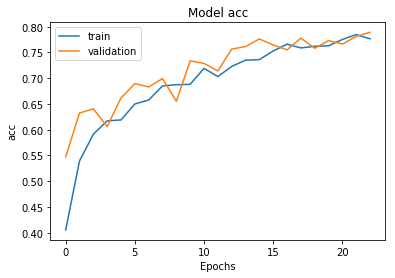

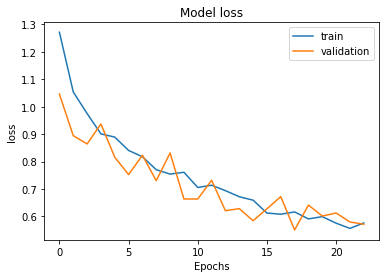

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 72s 523ms/step - loss: 1.1448 - acc: 0.4852 - val_loss: 0.8800 - val_acc: 0.6405
Epoch 2/50
138/138 [==============================] - 65s 474ms/step - loss: 0.9498 - acc: 0.6099 - val_loss: 0.7882 - val_acc: 0.6601
Epoch 3/50
138/138 [==============================] - 69s 498ms/step - loss: 0.8595 - acc: 0.6588 - val_loss: 0.7343 - val_acc: 0.6993
Epoch 4/50
138/138 [==============================] - 67s 483ms/step - loss: 0.7824 - acc: 0.6928 - val_loss: 0.8156 - val_acc: 0.6324
Epoch 5/50
138/138 [==============================] - 74s 535ms/step - loss: 0.7710 - acc: 0.6919 - val_loss: 0.6703 - val_acc: 0.7386
Epoch 6/50
138/138 [==============================] - 63s 454ms/step - loss: 0.7388 - acc: 0.7080 - val_loss: 0.6638 - val_acc: 0.7435
Epoch 7/50
138/138 [==============================] - 61s 439ms/st

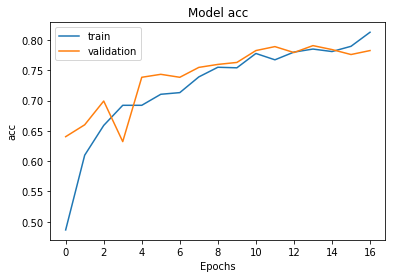

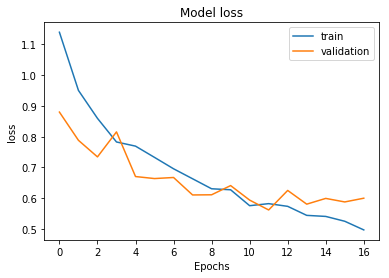

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 70s 1s/step - loss: 1.1384 - acc: 0.4813 - val_loss: 1.0776 - val_acc: 0.5670
Epoch 2/50
69/69 [==============================] - 66s 960ms/step - loss: 0.9511 - acc: 0.5964 - val_loss: 0.8922 - val_acc: 0.6389
Epoch 3/50
69/69 [==============================] - 59s 850ms/step - loss: 0.8880 - acc: 0.6408 - val_loss: 0.7820 - val_acc: 0.6846
Epoch 4/50
69/69 [==============================] - 62s 903ms/step - loss: 0.8310 - acc: 0.6657 - val_loss: 0.7940 - val_acc: 0.7010
Epoch 5/50
69/69 [==============================] - 69s 998ms/step - loss: 0.8040 - acc: 0.6684 - val_loss: 0.7371 - val_acc: 0.6863
Epoch 6/50
69/69 [==============================] - 68s 992ms/step - loss: 0.7553 - acc: 0.6867 - val_loss: 0.7672 - val_acc: 0.7026
Epoch 7/50
69/69 [==============================] - 58s 839ms/step - loss: 0.7428

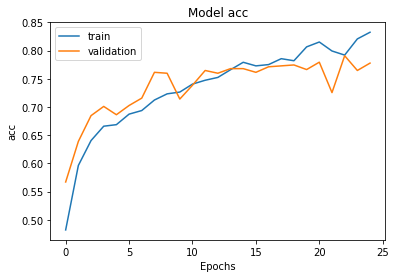

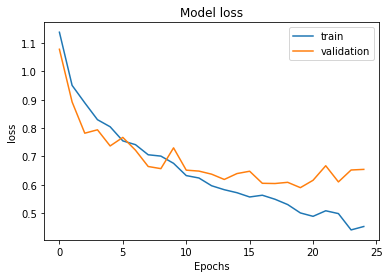

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 65s 2s/step - loss: 1.2075 - acc: 0.4480 - val_loss: 0.9375 - val_acc: 0.6193
Epoch 2/50
35/35 [==============================] - 59s 2s/step - loss: 0.9780 - acc: 0.5904 - val_loss: 0.8601 - val_acc: 0.6585
Epoch 3/50
35/35 [==============================] - 57s 2s/step - loss: 0.9332 - acc: 0.6150 - val_loss: 0.8303 - val_acc: 0.6863
Epoch 4/50
35/35 [==============================] - 56s 2s/step - loss: 0.8560 - acc: 0.6440 - val_loss: 0.7850 - val_acc: 0.6863
Epoch 5/50
35/35 [==============================] - 57s 2s/step - loss: 0.8139 - acc: 0.6762 - val_loss: 0.7616 - val_acc: 0.6993
Epoch 6/50
35/35 [==============================] - 56s 2s/step - loss: 0.7811 - acc: 0.6829 - val_loss: 0.7365 - val_acc: 0.7124
Epoch 7/50
35/35 [==============================] - 56s 2s/step - loss: 0.7738 - acc: 0.6923 - v

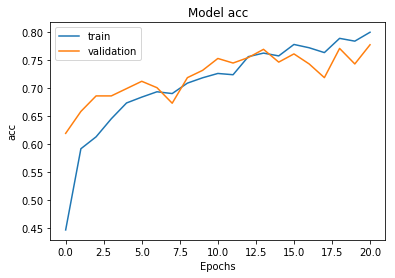

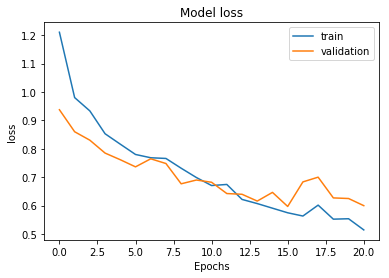

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 27s 197ms/step - loss: 1.1916 - acc: 0.4448 - val_loss: 0.9278 - val_acc: 0.6013
Epoch 2/50
138/138 [==============================] - 23s 164ms/step - loss: 0.9614 - acc: 0.5841 - val_loss: 1.0046 - val_acc: 0.5458
Epoch 3/50
138/138 [==============================] - 23s 166ms/step - loss: 0.9259 - acc: 0.6049 - val_loss: 0.8027 - val_acc: 0.6569
Epoch 4/50
138/138 [==============================] - 23s 167ms/step - loss: 0.8551 - acc: 0.6371 - val_loss: 0.8247 - val_acc: 0.6503
Epoch 5/50
138/138 [==============================] - 24s 171ms/step - loss: 0.8279 - acc: 0.6515 - val_loss: 0.7730 - val_acc: 0.6944
Epoch 6/50
138/138 [==============================] - 23s 164ms/step - loss: 0.7878 - acc: 0.6771 - val_loss: 0.8326 - val_acc: 0.6520
Epoch 7/50
138/138 [==============================] - 23s 168ms/st

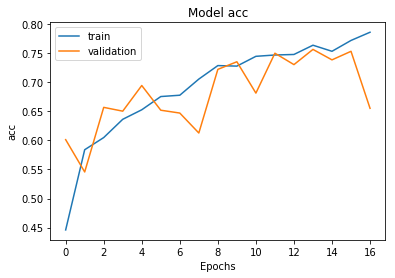

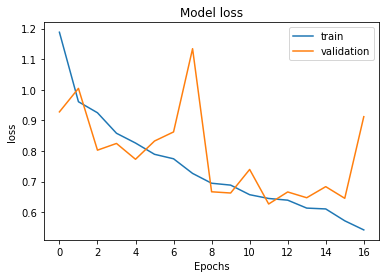

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 25s 359ms/step - loss: 1.2129 - acc: 0.4202 - val_loss: 0.9685 - val_acc: 0.5637
Epoch 2/50
69/69 [==============================] - 21s 303ms/step - loss: 0.9923 - acc: 0.5690 - val_loss: 0.8601 - val_acc: 0.6193
Epoch 3/50
69/69 [==============================] - 21s 311ms/step - loss: 0.9186 - acc: 0.6082 - val_loss: 0.8450 - val_acc: 0.6242
Epoch 4/50
69/69 [==============================] - 21s 309ms/step - loss: 0.8522 - acc: 0.6290 - val_loss: 0.7826 - val_acc: 0.6601
Epoch 5/50
69/69 [==============================] - 22s 319ms/step - loss: 0.8178 - acc: 0.6514 - val_loss: 0.7975 - val_acc: 0.6814
Epoch 6/50
69/69 [==============================] - 22s 322ms/step - loss: 0.7898 - acc: 0.6625 - val_loss: 0.7185 - val_acc: 0.7124
Epoch 7/50
69/69 [==============================] - 22s 317ms/step - loss: 0.7

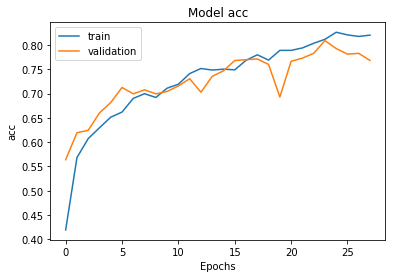

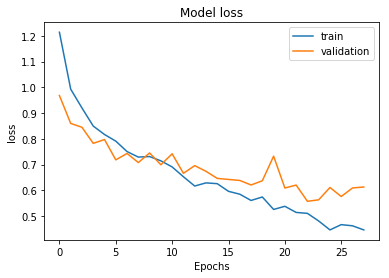

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 23s 658ms/step - loss: 1.2064 - acc: 0.4359 - val_loss: 0.9954 - val_acc: 0.5605
Epoch 2/50
35/35 [==============================] - 20s 570ms/step - loss: 1.0010 - acc: 0.5467 - val_loss: 0.9932 - val_acc: 0.5850
Epoch 3/50
35/35 [==============================] - 21s 587ms/step - loss: 0.9672 - acc: 0.5788 - val_loss: 0.8705 - val_acc: 0.6127
Epoch 4/50
35/35 [==============================] - 20s 581ms/step - loss: 0.8816 - acc: 0.6239 - val_loss: 0.8411 - val_acc: 0.6275
Epoch 5/50
35/35 [==============================] - 21s 586ms/step - loss: 0.8621 - acc: 0.6320 - val_loss: 0.8226 - val_acc: 0.6356
Epoch 6/50
35/35 [==============================] - 20s 578ms/step - loss: 0.8508 - acc: 0.6338 - val_loss: 0.8039 - val_acc: 0.6503
Epoch 7/50
35/35 [==============================] - 20s 586ms/step - loss: 0.8

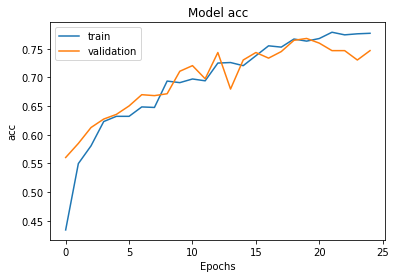

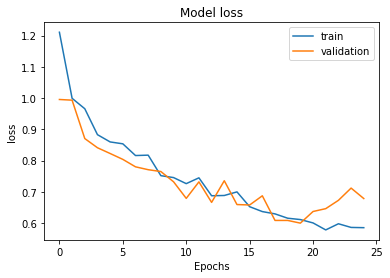

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 67s 489ms/step - loss: 1.1913 - acc: 0.4667 - val_loss: 0.9446 - val_acc: 0.6013
Epoch 2/50
138/138 [==============================] - 64s 463ms/step - loss: 0.9542 - acc: 0.5922 - val_loss: 0.8871 - val_acc: 0.6438
Epoch 3/50
138/138 [==============================] - 63s 456ms/step - loss: 0.8902 - acc: 0.6271 - val_loss: 0.7834 - val_acc: 0.6765
Epoch 4/50
138/138 [==============================] - 64s 464ms/step - loss: 0.8401 - acc: 0.6538 - val_loss: 0.7775 - val_acc: 0.6928
Epoch 5/50
138/138 [==============================] - 63s 455ms/step - loss: 0.8086 - acc: 0.6687 - val_loss: 0.7311 - val_acc: 0.7092
Epoch 6/50
138/138 [==============================] - 63s 456ms/step - loss: 0.7701 - acc: 0.7051 - val_loss: 0.6886 - val_acc: 0.7124
Epoch 7/50
138/138 [==============================] - 63s 456ms/st

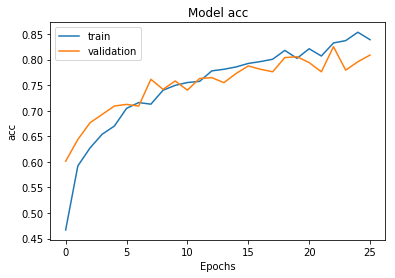

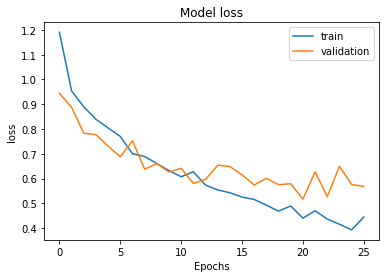

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 67s 971ms/step - loss: 1.1722 - acc: 0.4695 - val_loss: 0.9615 - val_acc: 0.6013
Epoch 2/50
69/69 [==============================] - 61s 883ms/step - loss: 0.9611 - acc: 0.5928 - val_loss: 0.8754 - val_acc: 0.6405
Epoch 3/50
69/69 [==============================] - 61s 887ms/step - loss: 0.8755 - acc: 0.6596 - val_loss: 0.7899 - val_acc: 0.6650
Epoch 4/50
69/69 [==============================] - 66s 959ms/step - loss: 0.8444 - acc: 0.6730 - val_loss: 0.7461 - val_acc: 0.7042
Epoch 5/50
69/69 [==============================] - 61s 884ms/step - loss: 0.8125 - acc: 0.6883 - val_loss: 0.7206 - val_acc: 0.7288
Epoch 6/50
69/69 [==============================] - 61s 883ms/step - loss: 0.7669 - acc: 0.6974 - val_loss: 0.6715 - val_acc: 0.7418
Epoch 7/50
69/69 [==============================] - 62s 893ms/step - loss: 0.7

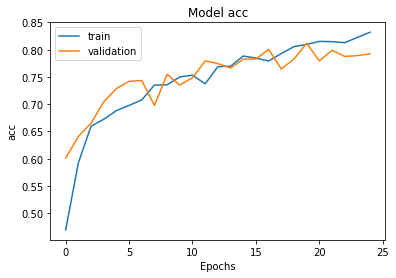

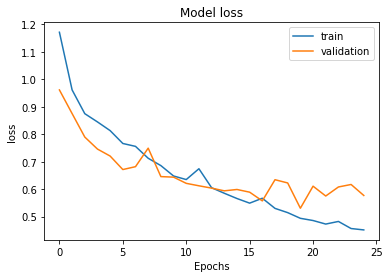

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 68s 2s/step - loss: 1.2482 - acc: 0.4158 - val_loss: 0.9519 - val_acc: 0.6029
Epoch 2/50
35/35 [==============================] - 60s 2s/step - loss: 1.0150 - acc: 0.5529 - val_loss: 0.8970 - val_acc: 0.6029
Epoch 3/50
35/35 [==============================] - 60s 2s/step - loss: 0.9399 - acc: 0.5891 - val_loss: 0.8564 - val_acc: 0.6454
Epoch 4/50
35/35 [==============================] - 60s 2s/step - loss: 0.8712 - acc: 0.6298 - val_loss: 0.8392 - val_acc: 0.6716
Epoch 5/50
35/35 [==============================] - 60s 2s/step - loss: 0.8594 - acc: 0.6360 - val_loss: 0.7830 - val_acc: 0.6732
Epoch 6/50
35/35 [==============================] - 60s 2s/step - loss: 0.8092 - acc: 0.6699 - val_loss: 0.7365 - val_acc: 0.7042
Epoch 7/50
35/35 [==============================] - 60s 2s/step - loss: 0.7833 - acc: 0.6762 - v

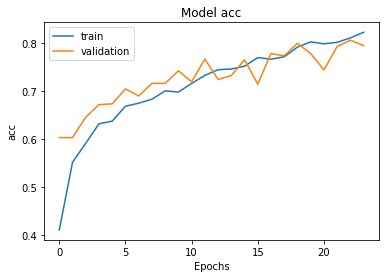

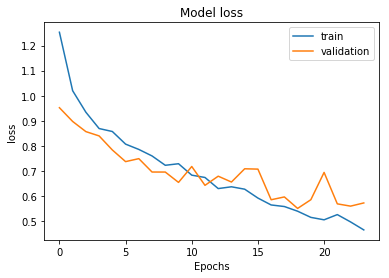

In [7]:
from keras.callbacks import EarlyStopping

Results = []

for iter in [0,1]:
    for nb_filters in [16,32]:
        for nb_layers in range(1,5):
            for img_size in [64,128]: 
                for batch_size in [16,32,64]:
                    train_generator, validation_generator, test_generator = create_generators(img_size = img_size, batch_size = batch_size)
                    model = create_model(nb_filters,nb_layers,img_size = img_size)
                    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
                    History = model.fit_generator(train_generator,
                                      steps_per_epoch = len(train_generator),
                                      nb_epoch = 50,
                                      validation_data = validation_generator,
                                      validation_steps = len(validation_generator),
                                      callbacks=[early_stopping]
                                     )
                    print('\nNumber of layers: ' + str(nb_layers) + ' ImgSize: ' + str(img_size) + ' Batch size: ' + str(batch_size) + ' :')
                    draw_graph(History, 'acc')
                    draw_graph(History, 'loss')
                    result = model.evaluate_generator(validation_generator, len(validation_generator))
                    Results.append(result)
        


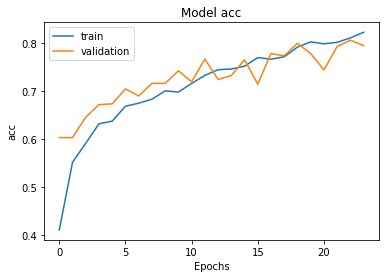

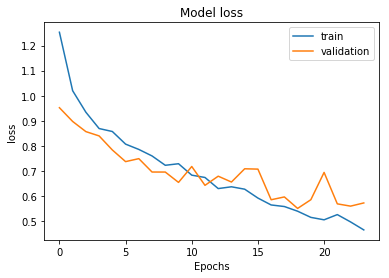

In [8]:
draw_graph(History, 'acc')
draw_graph(History, 'loss')

In [20]:
def print_results(Results):
    i = 0
    print('Filters ' +'Layers ' + ' ImgSize ' + ' Bathc size ' + ' Accuracy 1 ' + ' Accuracy 2 ')
    for nb_filters in [16, 32]:
        for nb_layers in range(1,5):
            for img_size in [64,128]: 
                for batch_size in [16,32,64]:
                    print( '%7d %6d  %7d  %10d %11.3f %11.3f' % (nb_filters ,nb_layers,img_size,batch_size,Results[i][1]*100,Results[i+48][1]*100))
                    #Results[i+64][1]
                    i = i + 1
                
print_results(Results)

Filters Layers  ImgSize  Bathc size  Accuracy 1  Accuracy 2 
     16      1       64          16      73.529      74.020
     16      1       64          32      73.203      74.837
     16      1       64          64      71.895      72.549
     16      1      128          16      74.183      70.098
     16      1      128          32      75.490      67.810
     16      1      128          64      74.837      66.340
     16      2       64          16      75.000      74.510
     16      2       64          32      75.163      75.817
     16      2       64          64      77.614      76.961
     16      2      128          16      74.183      75.327
     16      2      128          32      75.000      73.203
     16      2      128          64      78.758      77.778
     16      3       64          16      76.144      75.980
     16      3       64          32      73.693      76.471
     16      3       64          64      77.451      74.673
     16      3      128          16    

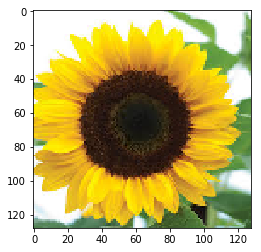

'sunflower'

In [21]:
from keras.preprocessing import image
import numpy as np 

def predict_flower(model = model, image_path = 'sunflower.jpg'):
    img = image.load_img(path=image_path,target_size=(128,128,3))
    plt.imshow(img)
    plt.show()
    img = np.reshape(img,[1,128,128,3])
    pred = model.predict([img])
    return find_label(pred[0])

predict_flower()

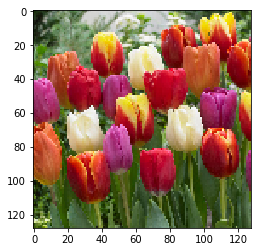

'tulip'

In [22]:
predict_flower(model, 'tulip.jpg')

In [23]:
from keras.preprocessing import image
from keras.models import Model

def display_activation(image_path, act_index): 
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    img = image.load_img(path=image_path,target_size=(128,128,3))
    img = np.reshape(img,[1,128,128,3])
    activations = activation_model.predict(img)
    activation = activations[act_index]
    activation_index=0
    nb_filters = activation.shape[3]
    for i in range(nb_filters):
        plt.imshow(activation[0, :, :, i])
        plt.show()


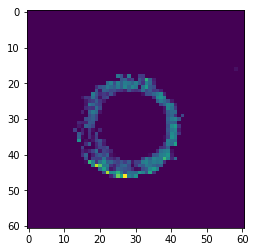

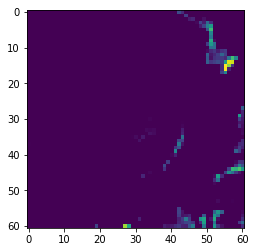

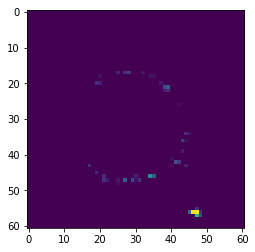

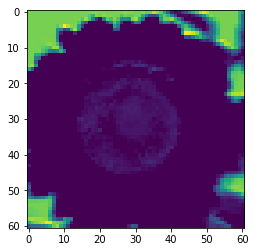

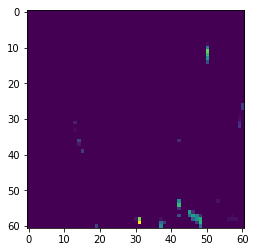

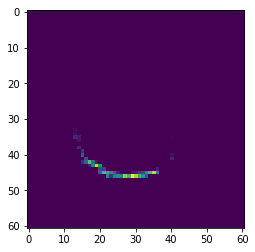

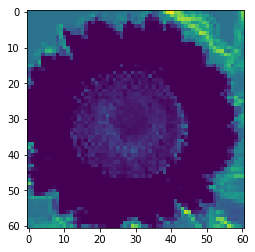

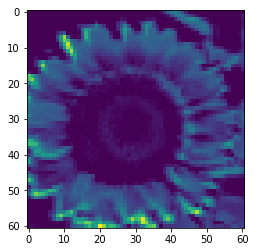

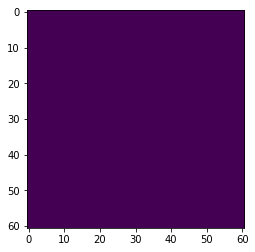

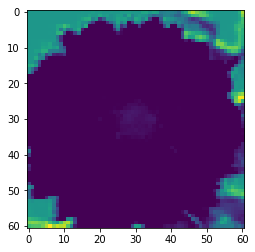

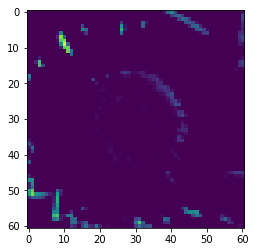

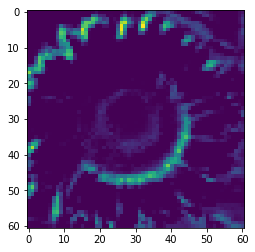

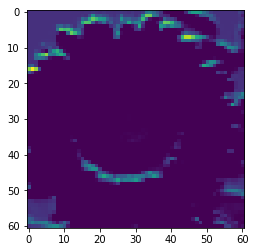

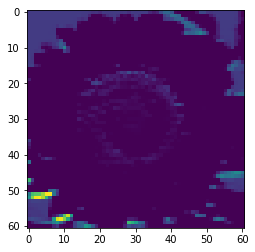

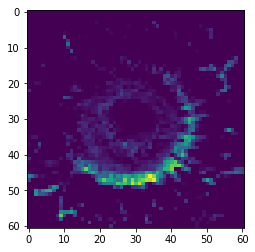

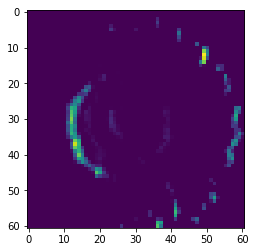

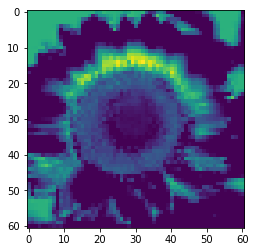

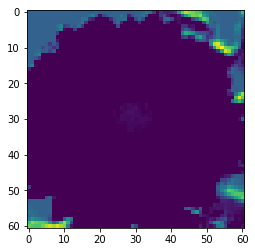

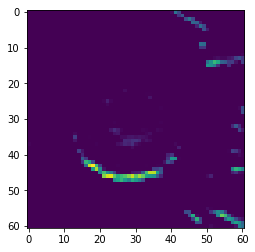

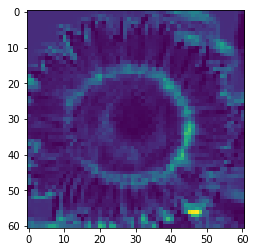

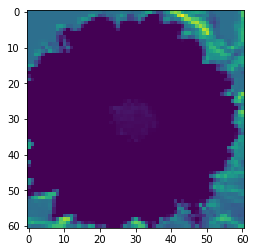

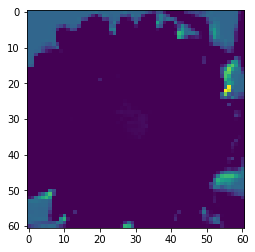

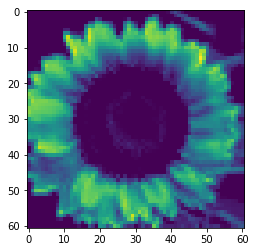

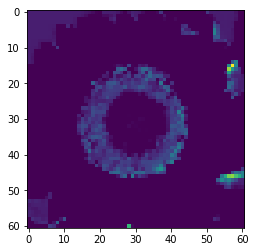

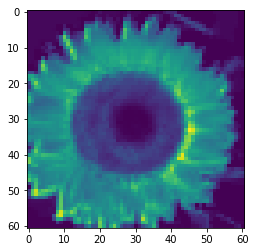

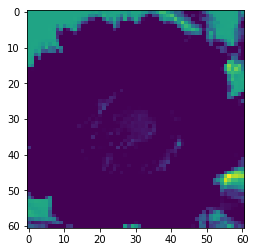

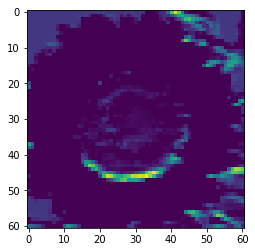

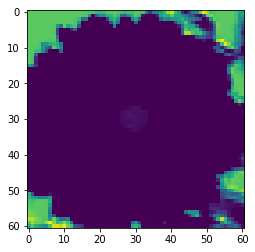

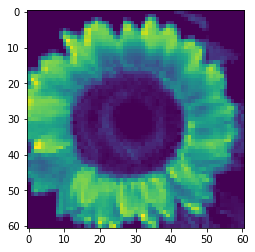

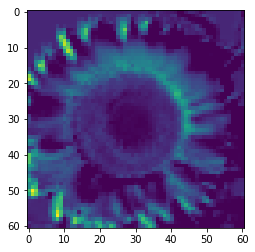

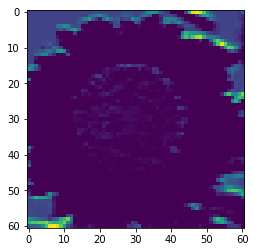

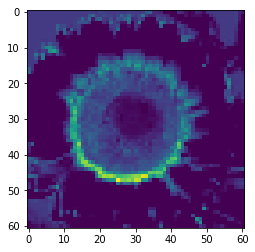

In [26]:
display_activation('sunflower.jpg', 2)

Found 309 images belonging to 4 classes.
Confusion matrix, without normalization


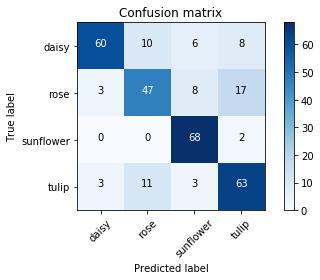

In [27]:
from sklearn.metrics import confusion_matrix

def create_cm_for_test(testdatapath = 'testing', img_size = 128):
    datagen = ImageDataGenerator(rescale = 1./255)
    test_generator = datagen.flow_from_directory(testdatapath,
                                            target_size = (img_size, img_size),
                                            class_mode = 'categorical',
                                            shuffle = False
                                            )
    Y_pred = model.predict_generator(test_generator, len(test_generator))
    y_pred = np.argmax(Y_pred, axis=1)
    cm = confusion_matrix(test_generator.classes, y_pred)
    plot_confusion_matrix(cm, test_generator.class_indices)
    
create_cm_for_test()


In [ ]:
img_size = 128
batch_size = 32
nb_layers = 3
train_generator, validation_generator, test_generator = create_generators(img_size = img_size, batch_size = batch_size)
model = create_model(32,nb_layers,img_size = img_size)
History = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_generator),
                              nb_epoch = 20,
                              validation_data = validation_generator,
                              validation_steps = len(validation_generator),
                             )
print('\nNumber of layers: ' + str(nb_layers) + ' ImgSize: ' + str(img_size) + ' Batch size: ' + str(batch_size) + ' :')
draw_graph(History, 'acc')
draw_graph(History, 'loss')

In [ ]:
Y_pred = model.predict_generator(test_generator, len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)

In [ ]:
(eval_loss, eval_accuracy) = model.evaluate_generator(test_generator, len(test_generator))
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))


In [ ]:
nb_layers = 5
img_size = 64
batch_size = 16
train_generator, validation_generator, test_generator = create_generators(img_size = img_size, batch_size = batch_size)
model = create_model(32,nb_layers,img_size = img_size)
History = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_generator),
                              nb_epoch = 50,
                              validation_data = validation_generator,
                              validation_steps = len(validation_generator),
                             )
print('\nNumber of layers: ' + str(nb_layers) + ' ImgSize: ' + str(img_size) + ' Batch size: ' + str(batch_size) + ' :')
draw_graph(History, 'acc')
draw_graph(History, 'loss')
           

In [ ]:
img_size = 128
train_generator, validation_generator, test_generator = create_generators(img_size = img_size, batch_size = 16)

model = Sequential()
    
model.add(Convolution2D(32, (3, 3), input_shape=(img_size, img_size, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Convolution2D(32 , (3, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation = 'sigmoid'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

History = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_generator),
                              nb_epoch = 50,
                              validation_data = validation_generator,
                              validation_steps = len(validation_generator),
                             )
draw_graph(History, 'acc')
draw_graph(History, 'loss')